# Importing necessary dataset

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Importing all 15 csv files

In [2]:
file_path = r'G:\DataScience\Data Insight\NAICS\csv_files'
all_csv_files = glob.glob(file_path + '/*.csv')

csv_list = []

for csv_file in all_csv_files:
    combined_dataframe = pd.read_csv(csv_file, index_col = None, header = 0)
    csv_list.append(combined_dataframe)
    
data = pd.concat(csv_list, axis = 0, ignore_index = True)
data

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250
...,...,...,...,...
119179,1999,12,9111,2250
119180,1999,12,9120,28500
119181,1999,12,9130,30250
119182,1999,12,9141,500


In [3]:
data.NAICS.value_counts()

Printing and related support activities[323]    276
3362                                            276
3364                                            276
3365                                            276
3366                                            276
                                               ... 
4879                                            180
3161                                            168
5612                                            108
Monetary authorities - central bank[521]         36
5211                                             36
Name: NAICS, Length: 437, dtype: int64

In [4]:
#data[['SYEAR', 'SMTH']] = data[['SYEAR', 'SMTH']].astype(object) 
#print(data.dtypes) 

## Getting *Postal service, couriers and messengers* from Postal service[491] & Couriers and messengers[492]

In [5]:
Couriers_and_messengers = data.loc[data['NAICS'].str.contains('492', na = False)]
Couriers_and_messengers

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5489,2000,1,Couriers and messengers[492],10000
5591,2000,2,Couriers and messengers[492],9250
5693,2000,3,Couriers and messengers[492],9750
5795,2000,4,Couriers and messengers[492],7250
5897,2000,5,Couriers and messengers[492],7250
...,...,...,...,...
33114,1999,8,Couriers and messengers[492],9500
33217,1999,9,Couriers and messengers[492],11000
33320,1999,10,Couriers and messengers[492],12750
33423,1999,11,Couriers and messengers[492],10000


In [6]:
Postal_service = data.loc[data['NAICS'].str.contains('491', na = False)]
Postal_service

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5543,2000,1,Postal service[491],9750
5645,2000,2,Postal service[491],8750
5747,2000,3,Postal service[491],8250
5849,2000,4,Postal service[491],7500
5951,2000,5,Postal service[491],9750
...,...,...,...,...
33169,1999,8,Postal service[491],6750
33272,1999,9,Postal service[491],7500
33375,1999,10,Postal service[491],8000
33478,1999,11,Postal service[491],6750


In [7]:
Postal_service_couriers_and_messengers = pd.concat([Postal_service, Couriers_and_messengers])
Postal_service_couriers_and_messengers

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5543,2000,1,Postal service[491],9750
5645,2000,2,Postal service[491],8750
5747,2000,3,Postal service[491],8250
5849,2000,4,Postal service[491],7500
5951,2000,5,Postal service[491],9750
...,...,...,...,...
33114,1999,8,Couriers and messengers[492],9500
33217,1999,9,Couriers and messengers[492],11000
33320,1999,10,Couriers and messengers[492],12750
33423,1999,11,Couriers and messengers[492],10000


### Changing all names of the NACIS column to *Postal service, couriers and messengers*

After changing all column names to *Postal service, couriers and messengers*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up consecutives even rows to get the sum of empoyments from both [491] and [492].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [8]:
Postal_service_couriers_and_messengers = Postal_service_couriers_and_messengers.replace(
    'Postal service[491]', 'Postal service, couriers and messengers')
Postal_service_couriers_and_messengers = Postal_service_couriers_and_messengers.replace(
    'Couriers and messengers[492]', 'Postal service, couriers and messengers')
Postal_service_couriers_and_messengers

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5543,2000,1,"Postal service, couriers and messengers",9750
5645,2000,2,"Postal service, couriers and messengers",8750
5747,2000,3,"Postal service, couriers and messengers",8250
5849,2000,4,"Postal service, couriers and messengers",7500
5951,2000,5,"Postal service, couriers and messengers",9750
...,...,...,...,...
33114,1999,8,"Postal service, couriers and messengers",9500
33217,1999,9,"Postal service, couriers and messengers",11000
33320,1999,10,"Postal service, couriers and messengers",12750
33423,1999,11,"Postal service, couriers and messengers",10000


In [9]:
df1 = Postal_service_couriers_and_messengers.sort_values(['SYEAR', 'SMTH'])
df1.head(50)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
29976,1997,1,"Postal service, couriers and messengers",8000
29921,1997,1,"Postal service, couriers and messengers",8250
30079,1997,2,"Postal service, couriers and messengers",8000
30024,1997,2,"Postal service, couriers and messengers",9000
30182,1997,3,"Postal service, couriers and messengers",7750
30127,1997,3,"Postal service, couriers and messengers",7500
30285,1997,4,"Postal service, couriers and messengers",8500
30230,1997,4,"Postal service, couriers and messengers",6000
30388,1997,5,"Postal service, couriers and messengers",7500
30333,1997,5,"Postal service, couriers and messengers",7500


In [10]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

,_EMPLOYMENT_
29976,8000
29921,8250
30079,8000
30024,9000
30182,7750
...,...
29618,0
29772,0
29719,0
29873,0


In [11]:
df.index = np.arange(1,len(df)+1)
df = df.reset_index()
df

,index,_EMPLOYMENT_
0,1,8000
1,2,8250
2,3,8000
3,4,9000
4,5,7750
...,...,...
547,548,0
548,549,0
549,550,0
550,551,0


In [12]:
df = df.set_index('index')
df_odd = df.loc[df.index.values % 2 == 1]
df_even = df.loc[df.index.values % 2 == 0]
df_even = df_even.set_index(df_even.index.values - 1)
new = df_odd.add(df_even, fill_value = 0)
new = new.reset_index().reset_index()
new

,level_0,index,_EMPLOYMENT_
0,0,1,16250
1,1,3,17000
2,2,5,15250
3,3,7,14500
4,4,9,15000
...,...,...,...
271,271,543,21250
272,272,545,19000
273,273,547,0
274,274,549,0


In [13]:
df2 = df1[np.arange(len(df)) % 2 == 0]
df2 = df2.reset_index().reset_index()
df2

,level_0,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,0,29976,1997,1,"Postal service, couriers and messengers",8000
1,1,30079,1997,2,"Postal service, couriers and messengers",8000
2,2,30182,1997,3,"Postal service, couriers and messengers",7750
3,3,30285,1997,4,"Postal service, couriers and messengers",8500
4,4,30388,1997,5,"Postal service, couriers and messengers",7500
...,...,...,...,...,...,...
271,271,29469,2019,8,"Postal service, couriers and messengers",9750
272,272,29570,2019,9,"Postal service, couriers and messengers",9750
273,273,29671,2019,10,"Postal service, couriers and messengers",0
274,274,29772,2019,11,"Postal service, couriers and messengers",0


In [14]:
df3 = pd.merge(df2, new, how = 'inner', on = 'level_0')
df3 = df3.drop(['level_0', 'index_x', '_EMPLOYMENT__x', 'index_y'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Postal_service_couriers_and_messengers   = df3

Postal_service_couriers_and_messengers = Postal_service_couriers_and_messengers[
    (Postal_service_couriers_and_messengers.SYEAR != 2019)]

Postal_service_couriers_and_messengers   

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,"Postal service, couriers and messengers",16250
1,1997,2,"Postal service, couriers and messengers",17000
2,1997,3,"Postal service, couriers and messengers",15250
3,1997,4,"Postal service, couriers and messengers",14500
4,1997,5,"Postal service, couriers and messengers",15000
...,...,...,...,...
259,2018,8,"Postal service, couriers and messengers",18500
260,2018,9,"Postal service, couriers and messengers",17000
261,2018,10,"Postal service, couriers and messengers",17000
262,2018,11,"Postal service, couriers and messengers",19250


## Getting *Farms* from Crop production[111] & Animal production and aquaculture[112]

In [15]:
Crop_Production = data.loc[data['NAICS'].str.contains('111', na = False)]
Crop_Production

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5491,2000,1,Crop production[111],11250
5593,2000,2,Crop production[111],10250
5695,2000,3,Crop production[111],13500
5797,2000,4,Crop production[111],17000
5899,2000,5,Crop production[111],21000
...,...,...,...,...
33116,1999,8,Crop production[111],20250
33219,1999,9,Crop production[111],19500
33322,1999,10,Crop production[111],17000
33425,1999,11,Crop production[111],13000


In [16]:
Animal_production_and_aquaculture = data.loc[data['NAICS'].str.contains('112', na = False)]
Animal_production_and_aquaculture

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5478,2000,1,Animal production and aquaculture[112],12250
5580,2000,2,Animal production and aquaculture[112],12000
5682,2000,3,Animal production and aquaculture[112],10500
5784,2000,4,Animal production and aquaculture[112],7500
5886,2000,5,Animal production and aquaculture[112],8500
...,...,...,...,...
33103,1999,8,Animal production and aquaculture[112],11500
33206,1999,9,Animal production and aquaculture[112],11500
33309,1999,10,Animal production and aquaculture[112],11500
33412,1999,11,Animal production and aquaculture[112],14000


In [17]:
Farms = pd.concat([Crop_Production, Animal_production_and_aquaculture])
Farms

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5491,2000,1,Crop production[111],11250
5593,2000,2,Crop production[111],10250
5695,2000,3,Crop production[111],13500
5797,2000,4,Crop production[111],17000
5899,2000,5,Crop production[111],21000
...,...,...,...,...
33103,1999,8,Animal production and aquaculture[112],11500
33206,1999,9,Animal production and aquaculture[112],11500
33309,1999,10,Animal production and aquaculture[112],11500
33412,1999,11,Animal production and aquaculture[112],14000


### Changing all names of the NACIS column to *Farms*

After changing all column names to *Farms*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up consecutives even rows to get the sum of empoyments from both [111] and [112].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [18]:
Farms = Farms.replace('Crop production[111]', 'Farms')
Farms = Farms.replace('Animal production and aquaculture[112]', 'Farms')
Farms

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5491,2000,1,Farms,11250
5593,2000,2,Farms,10250
5695,2000,3,Farms,13500
5797,2000,4,Farms,17000
5899,2000,5,Farms,21000
...,...,...,...,...
33103,1999,8,Farms,11500
33206,1999,9,Farms,11500
33309,1999,10,Farms,11500
33412,1999,11,Farms,14000


In [19]:
df1 = Farms.sort_values(['SYEAR', 'SMTH'])
df1.head(50)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
29923,1997,1,Farms,8750
29910,1997,1,Farms,13500
30026,1997,2,Farms,9750
30013,1997,2,Farms,14000
30129,1997,3,Farms,10500
30116,1997,3,Farms,13250
30232,1997,4,Farms,10500
30219,1997,4,Farms,15000
30335,1997,5,Farms,12000
30322,1997,5,Farms,15500


### Executing all aforementioned steps in one cell 

In [20]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

df.index = np.arange(1,len(df)+1)
df = df.reset_index()
df

df = df.set_index('index')
df_odd = df.loc[df.index.values % 2 == 1]
df_even = df.loc[df.index.values % 2 == 0]
df_even = df_even.set_index(df_even.index.values - 1)
new = df_odd.add(df_even, fill_value = 0)
new = new.reset_index().reset_index()
new

df2 = df1[np.arange(len(df)) % 2 == 0]
df2 = df2.reset_index().reset_index()
df2

df3 = pd.merge(df2, new, how = 'inner', on = 'level_0')
df3 = df3.drop(['level_0', 'index_x', '_EMPLOYMENT__x', 'index_y'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Farms = df3

Farms = Farms[(Farms.SYEAR != 2019)]

Farms

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Farms,22250
1,1997,2,Farms,23750
2,1997,3,Farms,23750
3,1997,4,Farms,25500
4,1997,5,Farms,27500
...,...,...,...,...
259,2018,8,Farms,19750
260,2018,9,Farms,24500
261,2018,10,Farms,21750
262,2018,11,Farms,22000


## Getting *Food, beverage and tobacco manufacturing* from Food manufacturing[311] & Beverage and tobacco product manufacturing[312]

In [21]:
Food_manufacturing = data.loc[data['NAICS'].str.contains('311', na = False)]
Food_manufacturing

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5501,2000,1,Food manufacturing[311],19500
5603,2000,2,Food manufacturing[311],16000
5705,2000,3,Food manufacturing[311],14750
5807,2000,4,Food manufacturing[311],18500
5909,2000,5,Food manufacturing[311],19750
...,...,...,...,...
33126,1999,8,Food manufacturing[311],19000
33229,1999,9,Food manufacturing[311],18250
33332,1999,10,Food manufacturing[311],20000
33435,1999,11,Food manufacturing[311],17500


In [22]:
Beverage_and_tobacco_product_manufacturing = data.loc[data['NAICS'].str.contains('312', na = False)]
Beverage_and_tobacco_product_manufacturing

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5479,2000,1,Beverage and tobacco product manufacturing[312],3250
5581,2000,2,Beverage and tobacco product manufacturing[312],4250
5683,2000,3,Beverage and tobacco product manufacturing[312],3750
5785,2000,4,Beverage and tobacco product manufacturing[312],4750
5887,2000,5,Beverage and tobacco product manufacturing[312],5000
...,...,...,...,...
33104,1999,8,Beverage and tobacco product manufacturing[312],3250
33207,1999,9,Beverage and tobacco product manufacturing[312],2250
33310,1999,10,Beverage and tobacco product manufacturing[312],2500
33413,1999,11,Beverage and tobacco product manufacturing[312],2000


In [23]:
Food_beverage_and_tobacco_manufacturing = pd.concat([Food_manufacturing, Beverage_and_tobacco_product_manufacturing])
Food_beverage_and_tobacco_manufacturing

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5501,2000,1,Food manufacturing[311],19500
5603,2000,2,Food manufacturing[311],16000
5705,2000,3,Food manufacturing[311],14750
5807,2000,4,Food manufacturing[311],18500
5909,2000,5,Food manufacturing[311],19750
...,...,...,...,...
33104,1999,8,Beverage and tobacco product manufacturing[312],3250
33207,1999,9,Beverage and tobacco product manufacturing[312],2250
33310,1999,10,Beverage and tobacco product manufacturing[312],2500
33413,1999,11,Beverage and tobacco product manufacturing[312],2000


### Changing all names of the NACIS column to *Food, beverage and tobacco manufacturing*

After changing all column names to *Food, beverage and tobacco manufacturing*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up consecutives even rows to get the sum of empoyments from both [311] and [312].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [24]:
Food_beverage_and_tobacco_manufacturing = Food_beverage_and_tobacco_manufacturing.replace(
    'Food manufacturing[311]', 'Food, beverage and tobacco manufacturing')
Food_beverage_and_tobacco_manufacturing = Food_beverage_and_tobacco_manufacturing.replace(
    'Beverage and tobacco product manufacturing[312]', 'Food, beverage and tobacco manufacturing')
Food_beverage_and_tobacco_manufacturing

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5501,2000,1,"Food, beverage and tobacco manufacturing",19500
5603,2000,2,"Food, beverage and tobacco manufacturing",16000
5705,2000,3,"Food, beverage and tobacco manufacturing",14750
5807,2000,4,"Food, beverage and tobacco manufacturing",18500
5909,2000,5,"Food, beverage and tobacco manufacturing",19750
...,...,...,...,...
33104,1999,8,"Food, beverage and tobacco manufacturing",3250
33207,1999,9,"Food, beverage and tobacco manufacturing",2250
33310,1999,10,"Food, beverage and tobacco manufacturing",2500
33413,1999,11,"Food, beverage and tobacco manufacturing",2000


In [25]:
df1 = Food_beverage_and_tobacco_manufacturing.sort_values(['SYEAR', 'SMTH'])
df1.tail(50)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
27408,2017,12,"Food, beverage and tobacco manufacturing",21750
27386,2017,12,"Food, beverage and tobacco manufacturing",8250
27509,2018,1,"Food, beverage and tobacco manufacturing",27000
27487,2018,1,"Food, beverage and tobacco manufacturing",8500
27610,2018,2,"Food, beverage and tobacco manufacturing",26000
27588,2018,2,"Food, beverage and tobacco manufacturing",8500
27711,2018,3,"Food, beverage and tobacco manufacturing",28250
27689,2018,3,"Food, beverage and tobacco manufacturing",6500
27812,2018,4,"Food, beverage and tobacco manufacturing",25000
27790,2018,4,"Food, beverage and tobacco manufacturing",8250


### Executing all aforementioned steps in one cell 

In [26]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

df.index = np.arange(1,len(df)+1)
df = df.reset_index()
df

df = df.set_index('index')
df_odd = df.loc[df.index.values % 2 == 1]
df_even = df.loc[df.index.values % 2 == 0]
df_even = df_even.set_index(df_even.index.values - 1)
new = df_odd.add(df_even, fill_value = 0)
new = new.reset_index().reset_index()
new

df2 = df1[np.arange(len(df)) % 2 == 0]
df2 = df2.reset_index().reset_index()
df2

df3 = pd.merge(df2, new, how = 'inner', on = 'level_0')
df3 = df3.drop(['level_0', 'index_x', '_EMPLOYMENT__x', 'index_y'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Food_beverage_and_tobacco_manufacturing = df3

Food_beverage_and_tobacco_manufacturing =Food_beverage_and_tobacco_manufacturing[
    (Food_beverage_and_tobacco_manufacturing.SYEAR != 2019)]

Food_beverage_and_tobacco_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,"Food, beverage and tobacco manufacturing",24000
1,1997,2,"Food, beverage and tobacco manufacturing",26500
2,1997,3,"Food, beverage and tobacco manufacturing",25250
3,1997,4,"Food, beverage and tobacco manufacturing",21000
4,1997,5,"Food, beverage and tobacco manufacturing",21750
...,...,...,...,...
259,2018,8,"Food, beverage and tobacco manufacturing",36250
260,2018,9,"Food, beverage and tobacco manufacturing",36250
261,2018,10,"Food, beverage and tobacco manufacturing",37250
262,2018,11,"Food, beverage and tobacco manufacturing",36000


## Getting  *Business, building and other support services*  from Management of companies and enterprises[55] & Administrative and support, waste management and remediation services[56]

The whole process was repeated to obatin the *Business, building and other support services*. After changing all column names to *Business, building and other support services*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up consecutives even rows to get the sum of empoyments from both [55] and [56].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [27]:
MCE = data[data['NAICS'] == 'Management of companies and enterprises [55]']
MCE

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
9,2000,1,Management of companies and enterprises [55],1000
29,2000,2,Management of companies and enterprises [55],1500
49,2000,3,Management of companies and enterprises [55],1500
69,2000,4,Management of companies and enterprises [55],1000
89,2000,5,Management of companies and enterprises [55],1000
...,...,...,...,...
5381,1999,8,Management of companies and enterprises [55],500
5401,1999,9,Management of companies and enterprises [55],250
5421,1999,10,Management of companies and enterprises [55],1250
5441,1999,11,Management of companies and enterprises [55],1500


In [28]:
MCE.SYEAR.value_counts().sort_values()

2015    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2014    12
2013    12
2006    12
2003    12
2002    12
2001    12
2000    12
1999    12
1998    12
2005    12
2004    12
1997    12
Name: SYEAR, dtype: int64

As we can see, **Management of companies and enterprises** collected data till 2015, as such the *2016-2019* data has to be removed from **Administrative and support, waste management and remediation services** before algorithm can correctly add consecutive even rows to get the required sum. After getting the correct sum, the *2016-2019* will be added.

In [29]:
AWR = data[data['NAICS'] == 'Administrative and support, waste management and remediation services [56]']
AWR

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
1,2000,1,"Administrative and support, waste management a...",59250
21,2000,2,"Administrative and support, waste management a...",64000
41,2000,3,"Administrative and support, waste management a...",64750
61,2000,4,"Administrative and support, waste management a...",66750
81,2000,5,"Administrative and support, waste management a...",63000
...,...,...,...,...
5373,1999,8,"Administrative and support, waste management a...",68750
5393,1999,9,"Administrative and support, waste management a...",65750
5413,1999,10,"Administrative and support, waste management a...",59000
5433,1999,11,"Administrative and support, waste management a...",62250


In [30]:
AWR_reduced = AWR[(data['SYEAR'] != 2016) & (data['SYEAR'] != 2017) & (data['SYEAR'] != 2018) & (data['SYEAR'] != 2019)]
AWR_reduced

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
1,2000,1,"Administrative and support, waste management a...",59250
21,2000,2,"Administrative and support, waste management a...",64000
41,2000,3,"Administrative and support, waste management a...",64750
61,2000,4,"Administrative and support, waste management a...",66750
81,2000,5,"Administrative and support, waste management a...",63000
...,...,...,...,...
5373,1999,8,"Administrative and support, waste management a...",68750
5393,1999,9,"Administrative and support, waste management a...",65750
5413,1999,10,"Administrative and support, waste management a...",59000
5433,1999,11,"Administrative and support, waste management a...",62250


In [31]:
AWR_removed_data = AWR[(data['SYEAR'] == 2016) | (data['SYEAR'] == 2017) | (data['SYEAR'] == 2018) | (data['SYEAR'] == 2019)]
AWR_removed_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
3841,2016,1,"Administrative and support, waste management a...",92250
3860,2016,2,"Administrative and support, waste management a...",92250
3879,2016,3,"Administrative and support, waste management a...",92750
3898,2016,4,"Administrative and support, waste management a...",100750
3917,2016,5,"Administrative and support, waste management a...",104750
3936,2016,6,"Administrative and support, waste management a...",113500
3955,2016,7,"Administrative and support, waste management a...",115750
3974,2016,8,"Administrative and support, waste management a...",122250
3993,2016,9,"Administrative and support, waste management a...",114000
4012,2016,10,"Administrative and support, waste management a...",109750


In [32]:
Business_building_and_other_support_services = pd.concat([MCE, AWR_reduced])
Business_building_and_other_support_services

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
9,2000,1,Management of companies and enterprises [55],1000
29,2000,2,Management of companies and enterprises [55],1500
49,2000,3,Management of companies and enterprises [55],1500
69,2000,4,Management of companies and enterprises [55],1000
89,2000,5,Management of companies and enterprises [55],1000
...,...,...,...,...
5373,1999,8,"Administrative and support, waste management a...",68750
5393,1999,9,"Administrative and support, waste management a...",65750
5413,1999,10,"Administrative and support, waste management a...",59000
5433,1999,11,"Administrative and support, waste management a...",62250


In [33]:
Business_building_and_other_support_services = Business_building_and_other_support_services.replace(
    'Management of companies and enterprises [55]', 'Business, building and other support services')
Business_building_and_other_support_services = Business_building_and_other_support_services.replace(
    'Administrative and support, waste management and remediation services [56]', 'Business, building and other support services')
Business_building_and_other_support_services

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
9,2000,1,"Business, building and other support services",1000
29,2000,2,"Business, building and other support services",1500
49,2000,3,"Business, building and other support services",1500
69,2000,4,"Business, building and other support services",1000
89,2000,5,"Business, building and other support services",1000
...,...,...,...,...
5373,1999,8,"Business, building and other support services",68750
5393,1999,9,"Business, building and other support services",65750
5413,1999,10,"Business, building and other support services",59000
5433,1999,11,"Business, building and other support services",62250


In [34]:
df1 = Business_building_and_other_support_services.sort_values(['SYEAR', 'SMTH'])
df1.head(50)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
4761,1997,1,"Business, building and other support services",1750
4753,1997,1,"Business, building and other support services",58500
4781,1997,2,"Business, building and other support services",500
4773,1997,2,"Business, building and other support services",60250
4801,1997,3,"Business, building and other support services",1000
4793,1997,3,"Business, building and other support services",55500
4821,1997,4,"Business, building and other support services",500
4813,1997,4,"Business, building and other support services",61000
4841,1997,5,"Business, building and other support services",500
4833,1997,5,"Business, building and other support services",60500


### Executing all aforementioned steps in one cell 

In [35]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

df.index = np.arange(1,len(df)+1)
df = df.reset_index()
df

df = df.set_index('index')
df_odd = df.loc[df.index.values % 2 == 1]
df_even = df.loc[df.index.values % 2 == 0]
df_even = df_even.set_index(df_even.index.values - 1)
new = df_odd.add(df_even, fill_value = 0)
new = new.reset_index().reset_index()
new

df2 = df1[np.arange(len(df)) % 2 == 0]
df2 = df2.reset_index().reset_index()
df2

df3 = pd.merge(df2, new, how = 'inner', on = 'level_0')
df3 = df3.drop(['level_0', 'index_x', '_EMPLOYMENT__x', 'index_y'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'NAICS', '_EMPLOYMENT_']
Business_building_and_other_support_services = df3

Business_building_and_other_support_services

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,"Business, building and other support services",60250
1,1997,2,"Business, building and other support services",60750
2,1997,3,"Business, building and other support services",56500
3,1997,4,"Business, building and other support services",61500
4,1997,5,"Business, building and other support services",61000
...,...,...,...,...
223,2015,8,"Business, building and other support services",104750
224,2015,9,"Business, building and other support services",95750
225,2015,10,"Business, building and other support services",95250
226,2015,11,"Business, building and other support services",97000


Adding removed data and renaming the coulmns now

In [36]:
Business_building_and_other_support_services = pd.concat([Business_building_and_other_support_services, AWR_removed_data])
Business_building_and_other_support_services.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']

Business_building_and_other_support_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,"Business, building and other support services",60250
1,1997,2,"Business, building and other support services",60750
2,1997,3,"Business, building and other support services",56500
3,1997,4,"Business, building and other support services",61500
4,1997,5,"Business, building and other support services",61000
...,...,...,...,...
4658,2019,8,"Administrative and support, waste management a...",117750
4677,2019,9,"Administrative and support, waste management a...",109750
4696,2019,10,"Administrative and support, waste management a...",0
4715,2019,11,"Administrative and support, waste management a...",0


In [37]:
Business_building_and_other_support_services = Business_building_and_other_support_services[
    (Business_building_and_other_support_services.SYEAR != 2019)]
Business_building_and_other_support_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,"Business, building and other support services",60250
1,1997,2,"Business, building and other support services",60750
2,1997,3,"Business, building and other support services",56500
3,1997,4,"Business, building and other support services",61500
4,1997,5,"Business, building and other support services",61000
...,...,...,...,...
4430,2018,8,"Administrative and support, waste management a...",110750
4449,2018,9,"Administrative and support, waste management a...",99000
4468,2018,10,"Administrative and support, waste management a...",99250
4487,2018,11,"Administrative and support, waste management a...",103000


## Getting  *Local and Indigenous public administration*  from Local, municipal and regional public administration[913], Aboriginal public administration[914] & International and other extra-territorial public administration[919]

The whole process was repeated to obatin the *Local and Indigenous public administration*. After changing all column names to *Business, building and other support services*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up three consecutives rows to get the sum of empoyments from [913], [914] and [919].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [38]:
LMRPA = data.loc[data['NAICS'].str.contains('913', na = False)]
LMRPA

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5518,2000,1,"Local, municipal and regional public administr...",28000
5620,2000,2,"Local, municipal and regional public administr...",25250
5722,2000,3,"Local, municipal and regional public administr...",30500
5824,2000,4,"Local, municipal and regional public administr...",26750
5926,2000,5,"Local, municipal and regional public administr...",30500
...,...,...,...,...
33143,1999,8,"Local, municipal and regional public administr...",32250
33246,1999,9,"Local, municipal and regional public administr...",26000
33349,1999,10,"Local, municipal and regional public administr...",27000
33452,1999,11,"Local, municipal and regional public administr...",24750


In [39]:
Aboriginal_public_administration = data.loc[data['NAICS'].str.contains('914', na = False)]
Aboriginal_public_administration

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5472,2000,1,Aboriginal public administration[914],500
5574,2000,2,Aboriginal public administration[914],1000
5676,2000,3,Aboriginal public administration[914],1750
5778,2000,4,Aboriginal public administration[914],2000
5880,2000,5,Aboriginal public administration[914],1500
...,...,...,...,...
33097,1999,8,Aboriginal public administration[914],1750
33200,1999,9,Aboriginal public administration[914],1500
33303,1999,10,Aboriginal public administration[914],750
33406,1999,11,Aboriginal public administration[914],1250


In [40]:
IETPA = data.loc[data['NAICS'].str.contains('919', na = False)]
IETPA

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5515,2000,1,International and other extra-territorial publ...,750
5617,2000,2,International and other extra-territorial publ...,500
5719,2000,3,International and other extra-territorial publ...,750
5821,2000,4,International and other extra-territorial publ...,500
5923,2000,5,International and other extra-territorial publ...,0
...,...,...,...,...
33140,1999,8,International and other extra-territorial publ...,250
33243,1999,9,International and other extra-territorial publ...,0
33346,1999,10,International and other extra-territorial publ...,0
33449,1999,11,International and other extra-territorial publ...,750


In [41]:
Local_and_Indigenous_public_administration = pd.concat([LMRPA, Aboriginal_public_administration, IETPA])
Local_and_Indigenous_public_administration

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5518,2000,1,"Local, municipal and regional public administr...",28000
5620,2000,2,"Local, municipal and regional public administr...",25250
5722,2000,3,"Local, municipal and regional public administr...",30500
5824,2000,4,"Local, municipal and regional public administr...",26750
5926,2000,5,"Local, municipal and regional public administr...",30500
...,...,...,...,...
33140,1999,8,International and other extra-territorial publ...,250
33243,1999,9,International and other extra-territorial publ...,0
33346,1999,10,International and other extra-territorial publ...,0
33449,1999,11,International and other extra-territorial publ...,750


In [42]:
Local_and_Indigenous_public_administration = Local_and_Indigenous_public_administration.replace(
    'Local, municipal and regional public administration[913]', 'Local and Indigenous public administration')
Local_and_Indigenous_public_administration = Local_and_Indigenous_public_administration.replace(
    'Aboriginal public administration[914]','Local and Indigenous public administration')
Local_and_Indigenous_public_administration = Local_and_Indigenous_public_administration.replace(
    'International and other extra-territorial public administration[919]', 'Local and Indigenous public administration')
Local_and_Indigenous_public_administration

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5518,2000,1,Local and Indigenous public administration,28000
5620,2000,2,Local and Indigenous public administration,25250
5722,2000,3,Local and Indigenous public administration,30500
5824,2000,4,Local and Indigenous public administration,26750
5926,2000,5,Local and Indigenous public administration,30500
...,...,...,...,...
33140,1999,8,Local and Indigenous public administration,250
33243,1999,9,Local and Indigenous public administration,0
33346,1999,10,Local and Indigenous public administration,0
33449,1999,11,Local and Indigenous public administration,750


In [43]:
df1 = Local_and_Indigenous_public_administration.sort_values(['SYEAR', 'SMTH'])
df1

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
29950,1997,1,Local and Indigenous public administration,32500
29904,1997,1,Local and Indigenous public administration,500
29947,1997,1,Local and Indigenous public administration,0
30053,1997,2,Local and Indigenous public administration,32500
30007,1997,2,Local and Indigenous public administration,750
...,...,...,...,...
29702,2019,11,Local and Indigenous public administration,0
29745,2019,11,Local and Indigenous public administration,0
29849,2019,12,Local and Indigenous public administration,0
29803,2019,12,Local and Indigenous public administration,0


### Executing the rest of the aforementioned steps in the subsequent cells

In [44]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

df.index = np.arange(1,len(df)+1)
df = df.reset_index()

df = df.set_index('index')
df_first = df.loc[df.index.values % 3 == 1].reset_index()
df_second = df.loc[df.index.values % 3 == 2].reset_index()
df_third = df.loc[df.index.values % 3 == 0].reset_index()

In [45]:
new  = pd.merge(df_first, df_second, left_index=True, right_index=True)
new  = pd.merge(new, df_third, left_index=True, right_index=True)
new['EMPLOYMENT'] = new['_EMPLOYMENT__x'] + new['_EMPLOYMENT__y'] + new['_EMPLOYMENT_']
new = new['EMPLOYMENT']
new.to_frame()

,EMPLOYMENT
0,33000
1,33250
2,33750
3,34500
4,32750
...,...
271,42000
272,45750
273,0
274,0


In [46]:
df2 = df1[np.arange(len(df)) % 3 == 0]
df2 = df2.reset_index().reset_index()
df2

,level_0,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,0,29950,1997,1,Local and Indigenous public administration,32500
1,1,30053,1997,2,Local and Indigenous public administration,32500
2,2,30156,1997,3,Local and Indigenous public administration,32500
3,3,30259,1997,4,Local and Indigenous public administration,33750
4,4,30362,1997,5,Local and Indigenous public administration,31500
...,...,...,...,...,...,...
271,271,29445,2019,8,Local and Indigenous public administration,40250
272,272,29546,2019,9,Local and Indigenous public administration,43500
273,273,29647,2019,10,Local and Indigenous public administration,0
274,274,29748,2019,11,Local and Indigenous public administration,0


In [47]:
df3 = pd.merge(df2, new, left_index=True, right_index=True)
df3 = df3.drop(['level_0', 'index', '_EMPLOYMENT_'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Local_and_Indigenous_public_administration = df3

Local_and_Indigenous_public_administration = Local_and_Indigenous_public_administration[
    (Local_and_Indigenous_public_administration.SYEAR != 2019)]

Local_and_Indigenous_public_administration

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Local and Indigenous public administration,33000
1,1997,2,Local and Indigenous public administration,33250
2,1997,3,Local and Indigenous public administration,33750
3,1997,4,Local and Indigenous public administration,34500
4,1997,5,Local and Indigenous public administration,32750
...,...,...,...,...
259,2018,8,Local and Indigenous public administration,43500
260,2018,9,Local and Indigenous public administration,43500
261,2018,10,Local and Indigenous public administration,36750
262,2018,11,Local and Indigenous public administration,32000


## Getting  *Broadcasting, data processing, and information*  from 	Broadcasting (except Internet)[515], Data processing, hosting, and related services[518] & International and other Other information services[519]

A new method was applied to obatin the *Broadcasting, data processing, and information*. The three extracted dataframes were merged on their indexes. Then, all the *Employment* columns were added to get the sum of empoyments from [515], [518] and [519]. 

After that, the other columns were removed, the NAICS column name was cahnged to *Broadcasting, data processing, and information* and the columns names were changed to reflect *Data Output Template*.

In [48]:
Broadcasting_exceptInternet = data.loc[data['NAICS'].str.contains('515', na = False)].reset_index()
Broadcasting_exceptInternet

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5480,2000,1,Broadcasting (except Internet)[515],4750
1,5582,2000,2,Broadcasting (except Internet)[515],5500
2,5684,2000,3,Broadcasting (except Internet)[515],5250
3,5786,2000,4,Broadcasting (except Internet)[515],6250
4,5888,2000,5,Broadcasting (except Internet)[515],4250
...,...,...,...,...,...
271,33105,1999,8,Broadcasting (except Internet)[515],4000
272,33208,1999,9,Broadcasting (except Internet)[515],3250
273,33311,1999,10,Broadcasting (except Internet)[515],4000
274,33414,1999,11,Broadcasting (except Internet)[515],4750


In [49]:
Data_processing_hosting = data.loc[data['NAICS'].str.contains('518', na = False)].reset_index()
Data_processing_hosting

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5492,2000,1,"Data processing, hosting, and related services...",750
1,5594,2000,2,"Data processing, hosting, and related services...",750
2,5696,2000,3,"Data processing, hosting, and related services...",750
3,5798,2000,4,"Data processing, hosting, and related services...",250
4,5900,2000,5,"Data processing, hosting, and related services...",250
...,...,...,...,...,...
271,33117,1999,8,"Data processing, hosting, and related services...",3250
272,33220,1999,9,"Data processing, hosting, and related services...",2250
273,33323,1999,10,"Data processing, hosting, and related services...",2250
274,33426,1999,11,"Data processing, hosting, and related services...",1500


In [50]:
other_information_services = data.loc[data['NAICS'].str.contains('519', na = False)].reset_index()
other_information_services

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5534,2000,1,Other information services[519],2250
1,5636,2000,2,Other information services[519],2500
2,5738,2000,3,Other information services[519],3000
3,5840,2000,4,Other information services[519],2000
4,5942,2000,5,Other information services[519],2500
...,...,...,...,...,...
271,33160,1999,8,Other information services[519],3250
272,33263,1999,9,Other information services[519],3250
273,33366,1999,10,Other information services[519],3000
274,33469,1999,11,Other information services[519],4500


In [51]:
Broadcasting_data_processing_and_information = pd.merge(
    Broadcasting_exceptInternet, Data_processing_hosting, left_index=True, right_index=True)
Broadcasting_data_processing_and_information = pd.merge(
    Broadcasting_data_processing_and_information, other_information_services, left_index=True, right_index=True)
Broadcasting_data_processing_and_information

,index_x,SYEAR_x,SMTH_x,NAICS_x,_EMPLOYMENT__x,index_y,SYEAR_y,SMTH_y,NAICS_y,_EMPLOYMENT__y,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5480,2000,1,Broadcasting (except Internet)[515],4750,5492,2000,1,"Data processing, hosting, and related services...",750,5534,2000,1,Other information services[519],2250
1,5582,2000,2,Broadcasting (except Internet)[515],5500,5594,2000,2,"Data processing, hosting, and related services...",750,5636,2000,2,Other information services[519],2500
2,5684,2000,3,Broadcasting (except Internet)[515],5250,5696,2000,3,"Data processing, hosting, and related services...",750,5738,2000,3,Other information services[519],3000
3,5786,2000,4,Broadcasting (except Internet)[515],6250,5798,2000,4,"Data processing, hosting, and related services...",250,5840,2000,4,Other information services[519],2000
4,5888,2000,5,Broadcasting (except Internet)[515],4250,5900,2000,5,"Data processing, hosting, and related services...",250,5942,2000,5,Other information services[519],2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,33105,1999,8,Broadcasting (except Internet)[515],4000,33117,1999,8,"Data processing, hosting, and related services...",3250,33160,1999,8,Other information services[519],3250
272,33208,1999,9,Broadcasting (except Internet)[515],3250,33220,1999,9,"Data processing, hosting, and related services...",2250,33263,1999,9,Other information services[519],3250
273,33311,1999,10,Broadcasting (except Internet)[515],4000,33323,1999,10,"Data processing, hosting, and related services...",2250,33366,1999,10,Other information services[519],3000
274,33414,1999,11,Broadcasting (except Internet)[515],4750,33426,1999,11,"Data processing, hosting, and related services...",1500,33469,1999,11,Other information services[519],4500


In [52]:
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.drop([
    'index_x', 'SYEAR_x', 'SMTH_x', 'NAICS_x', 'index_y', 'SYEAR_y', 'SMTH_y', 'NAICS_y', 'index'], axis =1)
Broadcasting_data_processing_and_information

,_EMPLOYMENT__x,_EMPLOYMENT__y,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,4750,750,2000,1,Other information services[519],2250
1,5500,750,2000,2,Other information services[519],2500
2,5250,750,2000,3,Other information services[519],3000
3,6250,250,2000,4,Other information services[519],2000
4,4250,250,2000,5,Other information services[519],2500
...,...,...,...,...,...,...
271,4000,3250,1999,8,Other information services[519],3250
272,3250,2250,1999,9,Other information services[519],3250
273,4000,2250,1999,10,Other information services[519],3000
274,4750,1500,1999,11,Other information services[519],4500


In [53]:
Broadcasting_data_processing_and_information['EMPLOYMENT'] =(Broadcasting_data_processing_and_information['_EMPLOYMENT__x'] + 
Broadcasting_data_processing_and_information['_EMPLOYMENT__y'] + Broadcasting_data_processing_and_information['_EMPLOYMENT_'])
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.drop(
    ['_EMPLOYMENT__x', '_EMPLOYMENT__y', '_EMPLOYMENT_'], axis = 1)
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.replace(
    'Other information services[519]', 'Broadcasting data processing and information')
Broadcasting_data_processing_and_information.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']

In [54]:
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information[
    (Broadcasting_data_processing_and_information.SYEAR != 2019)]

Broadcasting_data_processing_and_information

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Broadcasting data processing and information,7750
1,2000,2,Broadcasting data processing and information,8750
2,2000,3,Broadcasting data processing and information,9000
3,2000,4,Broadcasting data processing and information,8500
4,2000,5,Broadcasting data processing and information,7000
...,...,...,...,...
271,1999,8,Broadcasting data processing and information,10500
272,1999,9,Broadcasting data processing and information,8750
273,1999,10,Broadcasting data processing and information,9250
274,1999,11,Broadcasting data processing and information,10750


## Getting  *Transit, sightseeing, and pipeline transportation*  from Transit and ground passenger transportation[485], Pipeline transportation[486] & Scenic and sightseeing transportation[487]	

The new method was applied to obatin the *Transit, sightseeing, and pipeline transportation*. The three extracted dataframes were merged on their indexes. Then, all the *Employment* columns were added to get the sum of empoyments from [485], [486] and [487]. 

After that, the other columns were removed, the NAICS column name was cahnged to *Transit, sightseeing, and pipeline transportation* and the columns names were changed to reflect *Data Output Template*.

In [55]:
Transit_and_ground_passenger_transportation = data.loc[data['NAICS'].str.contains('485', na = False)].reset_index()
Transit_and_ground_passenger_transportation

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5566,2000,1,Transit and ground passenger transportation[485],13250
1,5668,2000,2,Transit and ground passenger transportation[485],15500
2,5770,2000,3,Transit and ground passenger transportation[485],14000
3,5872,2000,4,Transit and ground passenger transportation[485],10750
4,5974,2000,5,Transit and ground passenger transportation[485],12500
...,...,...,...,...,...
271,33192,1999,8,Transit and ground passenger transportation[485],15750
272,33295,1999,9,Transit and ground passenger transportation[485],15750
273,33398,1999,10,Transit and ground passenger transportation[485],16750
274,33501,1999,11,Transit and ground passenger transportation[485],15750


In [56]:
Pipeline_transportation = data.loc[data['NAICS'].str.contains('486', na = False)].reset_index()
Pipeline_transportation

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5541,2000,1,Pipeline transportation[486],750
1,5643,2000,2,Pipeline transportation[486],1000
2,5745,2000,3,Pipeline transportation[486],1250
3,5847,2000,4,Pipeline transportation[486],500
4,5949,2000,5,Pipeline transportation[486],250
...,...,...,...,...,...
271,33167,1999,8,Pipeline transportation[486],250
272,33270,1999,9,Pipeline transportation[486],500
273,33373,1999,10,Pipeline transportation[486],1000
274,33476,1999,11,Pipeline transportation[486],750


In [57]:
Scenic_and_sightseeing_transportation = data.loc[data['NAICS'].str.contains('487', na = False)].reset_index()
Scenic_and_sightseeing_transportation

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5555,2000,1,Scenic and sightseeing transportation[487],500
1,5657,2000,2,Scenic and sightseeing transportation[487],750
2,5759,2000,3,Scenic and sightseeing transportation[487],1750
3,5861,2000,4,Scenic and sightseeing transportation[487],1750
4,5963,2000,5,Scenic and sightseeing transportation[487],500
...,...,...,...,...,...
271,33181,1999,8,Scenic and sightseeing transportation[487],1750
272,33284,1999,9,Scenic and sightseeing transportation[487],1250
273,33387,1999,10,Scenic and sightseeing transportation[487],1250
274,33490,1999,11,Scenic and sightseeing transportation[487],500


In [58]:
Transit_sightseeing_and_pipeline_transportation = pd.merge(
    Transit_and_ground_passenger_transportation, Pipeline_transportation, left_index=True, right_index=True)
Transit_sightseeing_and_pipeline_transportation = pd.merge(
    Transit_sightseeing_and_pipeline_transportation, Scenic_and_sightseeing_transportation, left_index=True, right_index=True)
Transit_sightseeing_and_pipeline_transportation

,index_x,SYEAR_x,SMTH_x,NAICS_x,_EMPLOYMENT__x,index_y,SYEAR_y,SMTH_y,NAICS_y,_EMPLOYMENT__y,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5566,2000,1,Transit and ground passenger transportation[485],13250,5541,2000,1,Pipeline transportation[486],750,5555,2000,1,Scenic and sightseeing transportation[487],500
1,5668,2000,2,Transit and ground passenger transportation[485],15500,5643,2000,2,Pipeline transportation[486],1000,5657,2000,2,Scenic and sightseeing transportation[487],750
2,5770,2000,3,Transit and ground passenger transportation[485],14000,5745,2000,3,Pipeline transportation[486],1250,5759,2000,3,Scenic and sightseeing transportation[487],1750
3,5872,2000,4,Transit and ground passenger transportation[485],10750,5847,2000,4,Pipeline transportation[486],500,5861,2000,4,Scenic and sightseeing transportation[487],1750
4,5974,2000,5,Transit and ground passenger transportation[485],12500,5949,2000,5,Pipeline transportation[486],250,5963,2000,5,Scenic and sightseeing transportation[487],500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,33192,1999,8,Transit and ground passenger transportation[485],15750,33167,1999,8,Pipeline transportation[486],250,33181,1999,8,Scenic and sightseeing transportation[487],1750
272,33295,1999,9,Transit and ground passenger transportation[485],15750,33270,1999,9,Pipeline transportation[486],500,33284,1999,9,Scenic and sightseeing transportation[487],1250
273,33398,1999,10,Transit and ground passenger transportation[485],16750,33373,1999,10,Pipeline transportation[486],1000,33387,1999,10,Scenic and sightseeing transportation[487],1250
274,33501,1999,11,Transit and ground passenger transportation[485],15750,33476,1999,11,Pipeline transportation[486],750,33490,1999,11,Scenic and sightseeing transportation[487],500


In [59]:
Transit_sightseeing_and_pipeline_transportation = Transit_sightseeing_and_pipeline_transportation.drop([
    'index_x', 'SYEAR_x', 'SMTH_x', 'NAICS_x', 'index_y', 'SYEAR_y', 'SMTH_y', 'NAICS_y', 'index'], axis =1)
Transit_sightseeing_and_pipeline_transportation

,_EMPLOYMENT__x,_EMPLOYMENT__y,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,13250,750,2000,1,Scenic and sightseeing transportation[487],500
1,15500,1000,2000,2,Scenic and sightseeing transportation[487],750
2,14000,1250,2000,3,Scenic and sightseeing transportation[487],1750
3,10750,500,2000,4,Scenic and sightseeing transportation[487],1750
4,12500,250,2000,5,Scenic and sightseeing transportation[487],500
...,...,...,...,...,...,...
271,15750,250,1999,8,Scenic and sightseeing transportation[487],1750
272,15750,500,1999,9,Scenic and sightseeing transportation[487],1250
273,16750,1000,1999,10,Scenic and sightseeing transportation[487],1250
274,15750,750,1999,11,Scenic and sightseeing transportation[487],500


In [60]:
Transit_sightseeing_and_pipeline_transportation['EMPLOYMENT'] =(Transit_sightseeing_and_pipeline_transportation['_EMPLOYMENT__x'] + 
Transit_sightseeing_and_pipeline_transportation['_EMPLOYMENT__y'] + Transit_sightseeing_and_pipeline_transportation['_EMPLOYMENT_'])
Transit_sightseeing_and_pipeline_transportation = Transit_sightseeing_and_pipeline_transportation.drop(
    ['_EMPLOYMENT__x', '_EMPLOYMENT__y', '_EMPLOYMENT_'], axis = 1)
Transit_sightseeing_and_pipeline_transportation = Transit_sightseeing_and_pipeline_transportation.replace(
    'Scenic and sightseeing transportation[487]', 'Transit, sightseeing, and pipeline transportation')
Transit_sightseeing_and_pipeline_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Transit_sightseeing_and_pipeline_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,"Transit, sightseeing, and pipeline transportation",14500
1,2000,2,"Transit, sightseeing, and pipeline transportation",17250
2,2000,3,"Transit, sightseeing, and pipeline transportation",17000
3,2000,4,"Transit, sightseeing, and pipeline transportation",13000
4,2000,5,"Transit, sightseeing, and pipeline transportation",13250
...,...,...,...,...
271,1999,8,"Transit, sightseeing, and pipeline transportation",17750
272,1999,9,"Transit, sightseeing, and pipeline transportation",17500
273,1999,10,"Transit, sightseeing, and pipeline transportation",19000
274,1999,11,"Transit, sightseeing, and pipeline transportation",17000


In [61]:
Transit_sightseeing_and_pipeline_transportation = Transit_sightseeing_and_pipeline_transportation[
    (Transit_sightseeing_and_pipeline_transportation.SYEAR != 2019)]

Transit_sightseeing_and_pipeline_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,"Transit, sightseeing, and pipeline transportation",14500
1,2000,2,"Transit, sightseeing, and pipeline transportation",17250
2,2000,3,"Transit, sightseeing, and pipeline transportation",17000
3,2000,4,"Transit, sightseeing, and pipeline transportation",13000
4,2000,5,"Transit, sightseeing, and pipeline transportation",13250
...,...,...,...,...
271,1999,8,"Transit, sightseeing, and pipeline transportation",17750
272,1999,9,"Transit, sightseeing, and pipeline transportation",17500
273,1999,10,"Transit, sightseeing, and pipeline transportation",19000
274,1999,11,"Transit, sightseeing, and pipeline transportation",17000


## Getting  *Finance*  from Monetary authorities - central bank[521], Credit intermediation and related activities[522]	, International and Blank[523] & Funds and other financial vehicles[526]	

The new method was applied to obatin the *Finance*. The four extracted dataframes were merged on their indexes. Then, all the *Employment* columns were added to get the sum of empoyments from [521], [522], [523], and [526]. **This time around [523] had no rows as proven below. Also, [521] contains data for only 1997-1999, as such a little data manipulation was done to obtain the right results.**

After that, the other columns were removed, the NAICS column name was cahnged to *Finance* and the columns names were changed to reflect *Data Output Template*.

In [62]:
Monetary_authorities_central_bank = data.loc[data['NAICS'].str.contains('521', na = False)].reset_index()
Monetary_authorities_central_bank

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,29958,1997,1,Monetary authorities - central bank[521],0
1,30061,1997,2,Monetary authorities - central bank[521],0
2,30164,1997,3,Monetary authorities - central bank[521],0
3,30267,1997,4,Monetary authorities - central bank[521],0
4,30370,1997,5,Monetary authorities - central bank[521],0
5,30473,1997,6,Monetary authorities - central bank[521],0
6,30576,1997,7,Monetary authorities - central bank[521],0
7,30679,1997,8,Monetary authorities - central bank[521],0
8,30782,1997,9,Monetary authorities - central bank[521],0
9,30885,1997,10,Monetary authorities - central bank[521],0


In [63]:
Credit_intermediation_and_related_activities = data.loc[data['NAICS'].str.contains('522', na = False)].reset_index()
Credit_intermediation_and_related_activities

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5490,2000,1,Credit intermediation and related activities[522],38000
1,5592,2000,2,Credit intermediation and related activities[522],40500
2,5694,2000,3,Credit intermediation and related activities[522],42000
3,5796,2000,4,Credit intermediation and related activities[522],41250
4,5898,2000,5,Credit intermediation and related activities[522],40250
...,...,...,...,...,...
271,33115,1999,8,Credit intermediation and related activities[522],37250
272,33218,1999,9,Credit intermediation and related activities[522],38500
273,33321,1999,10,Credit intermediation and related activities[522],37750
274,33424,1999,11,Credit intermediation and related activities[522],37250


In [64]:
blank_for_523 = data.loc[data['NAICS'].str.contains('523', na = False)].reset_index()
blank_for_523

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_


In [65]:
Funds_and_other_financial_vehicles = data.loc[data['NAICS'].str.contains('526', na = False)].reset_index()
Funds_and_other_financial_vehicles.columns = ['index', 'SYEAR', 'SMTH', 'NAICS', '_EMPLOYMENT_']
Funds_and_other_financial_vehicles

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5505,2000,1,Funds and other financial vehicles[526],0
1,5607,2000,2,Funds and other financial vehicles[526],0
2,5709,2000,3,Funds and other financial vehicles[526],0
3,5811,2000,4,Funds and other financial vehicles[526],0
4,5913,2000,5,Funds and other financial vehicles[526],0
...,...,...,...,...,...
271,33130,1999,8,Funds and other financial vehicles[526],0
272,33233,1999,9,Funds and other financial vehicles[526],0
273,33336,1999,10,Funds and other financial vehicles[526],0
274,33439,1999,11,Funds and other financial vehicles[526],0


In [66]:
add_on = Funds_and_other_financial_vehicles.loc[(Funds_and_other_financial_vehicles['SYEAR'] != 1997) & (Funds_and_other_financial_vehicles['SYEAR'] != 1998) & (Funds_and_other_financial_vehicles['SYEAR'] != 1999)]
add_on = add_on.drop('_EMPLOYMENT_', axis =1)
add_on['_EMPLOYMENT_'] = 0
Monetary_authorities_central_bank = pd.concat([Monetary_authorities_central_bank, add_on])
Monetary_authorities_central_bank

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,29958,1997,1,Monetary authorities - central bank[521],0
1,30061,1997,2,Monetary authorities - central bank[521],0
2,30164,1997,3,Monetary authorities - central bank[521],0
3,30267,1997,4,Monetary authorities - central bank[521],0
4,30370,1997,5,Monetary authorities - central bank[521],0
...,...,...,...,...,...
235,29432,2019,8,Funds and other financial vehicles[526],0
236,29533,2019,9,Funds and other financial vehicles[526],0
237,29634,2019,10,Funds and other financial vehicles[526],0
238,29735,2019,11,Funds and other financial vehicles[526],0


In [67]:
Finance = pd.merge(
   Monetary_authorities_central_bank,Credit_intermediation_and_related_activities, left_index=True, right_index=True)
Finance = pd.merge(
    Finance, Funds_and_other_financial_vehicles, left_index=True, right_index=True)
Finance

,index_x,SYEAR_x,SMTH_x,NAICS_x,_EMPLOYMENT__x,index_y,SYEAR_y,SMTH_y,NAICS_y,_EMPLOYMENT__y,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,29958,1997,1,Monetary authorities - central bank[521],0,5490,2000,1,Credit intermediation and related activities[522],38000,5505,2000,1,Funds and other financial vehicles[526],0
0,5505,2000,1,Funds and other financial vehicles[526],0,5490,2000,1,Credit intermediation and related activities[522],38000,5505,2000,1,Funds and other financial vehicles[526],0
1,30061,1997,2,Monetary authorities - central bank[521],0,5592,2000,2,Credit intermediation and related activities[522],40500,5607,2000,2,Funds and other financial vehicles[526],0
1,5607,2000,2,Funds and other financial vehicles[526],0,5592,2000,2,Credit intermediation and related activities[522],40500,5607,2000,2,Funds and other financial vehicles[526],0
2,30164,1997,3,Monetary authorities - central bank[521],0,5694,2000,3,Credit intermediation and related activities[522],42000,5709,2000,3,Funds and other financial vehicles[526],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,29432,2019,8,Funds and other financial vehicles[526],0,29417,2019,8,Credit intermediation and related activities[522],42750,29432,2019,8,Funds and other financial vehicles[526],250
236,29533,2019,9,Funds and other financial vehicles[526],0,29518,2019,9,Credit intermediation and related activities[522],41750,29533,2019,9,Funds and other financial vehicles[526],250
237,29634,2019,10,Funds and other financial vehicles[526],0,29619,2019,10,Credit intermediation and related activities[522],0,29634,2019,10,Funds and other financial vehicles[526],0
238,29735,2019,11,Funds and other financial vehicles[526],0,29720,2019,11,Credit intermediation and related activities[522],0,29735,2019,11,Funds and other financial vehicles[526],0


In [68]:
Finance = Finance.drop([
    'index_x', 'SYEAR_x', 'SMTH_x', 'NAICS_x', 'index_y', 'SYEAR_y', 'SMTH_y', 'NAICS_y', 'index'], axis =1)
Finance

,_EMPLOYMENT__x,_EMPLOYMENT__y,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,0,38000,2000,1,Funds and other financial vehicles[526],0
0,0,38000,2000,1,Funds and other financial vehicles[526],0
1,0,40500,2000,2,Funds and other financial vehicles[526],0
1,0,40500,2000,2,Funds and other financial vehicles[526],0
2,0,42000,2000,3,Funds and other financial vehicles[526],0
...,...,...,...,...,...,...
235,0,42750,2019,8,Funds and other financial vehicles[526],250
236,0,41750,2019,9,Funds and other financial vehicles[526],250
237,0,0,2019,10,Funds and other financial vehicles[526],0
238,0,0,2019,11,Funds and other financial vehicles[526],0


In [69]:
Finance['EMPLOYMENT'] =(Finance['_EMPLOYMENT__x'] + 
Finance['_EMPLOYMENT__y'] + Finance['_EMPLOYMENT_'])
Finance = Finance.drop(
    ['_EMPLOYMENT__x', '_EMPLOYMENT__y', '_EMPLOYMENT_'], axis = 1)
Finance = Finance.replace(
    'Funds and other financial vehicles[526]', 'Finance')
Finance.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Finance

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Finance,38000
0,2000,1,Finance,38000
1,2000,2,Finance,40500
1,2000,2,Finance,40500
2,2000,3,Finance,42000
...,...,...,...,...
235,2019,8,Finance,43000
236,2019,9,Finance,42000
237,2019,10,Finance,0
238,2019,11,Finance,0


In [70]:
Finance = Finance[(Finance.SYEAR != 2019)]
Finance

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Finance,38000
0,2000,1,Finance,38000
1,2000,2,Finance,40500
1,2000,2,Finance,40500
2,2000,3,Finance,42000
...,...,...,...,...
223,2018,8,Finance,42750
224,2018,9,Finance,47500
225,2018,10,Finance,48750
226,2018,11,Finance,44500


## Getting  *Private and trades education*  from Business and secretarial schools[6114], Technical and trade schools[6115]	,  Other schools and instruction[6116] & Educational support services[6117]	

A new method was applied to obatin the *Private and trades education*. **The four extracted dataframes' __EMPLOYMENT__ were added to get the accurate results without merge methods.

In [71]:
BSS = data.loc[data['NAICS'] == 6114].reset_index()
BSS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33872,2000,1,6114,1000
1,34184,2000,2,6114,750
2,34496,2000,3,6114,1000
3,34808,2000,4,6114,1000
4,35120,2000,5,6114,500
...,...,...,...,...,...
271,117896,1999,8,6114,1250
272,118205,1999,9,6114,750
273,118514,1999,10,6114,1750
274,118823,1999,11,6114,2000


In [72]:
TTS = data.loc[data['NAICS'] == 6115].reset_index()
TTS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33873,2000,1,6115,2750
1,34185,2000,2,6115,2750
2,34497,2000,3,6115,2500
3,34809,2000,4,6115,2000
4,35121,2000,5,6115,2000
...,...,...,...,...,...
271,117897,1999,8,6115,1500
272,118206,1999,9,6115,1000
273,118515,1999,10,6115,1750
274,118824,1999,11,6115,1250


In [73]:
OSI = data.loc[data['NAICS'] == 6116].reset_index()
OSI

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33874,2000,1,6116,16750
1,34186,2000,2,6116,15250
2,34498,2000,3,6116,14750
3,34810,2000,4,6116,13000
4,35122,2000,5,6116,11500
...,...,...,...,...,...
271,117898,1999,8,6116,12250
272,118207,1999,9,6116,14500
273,118516,1999,10,6116,14000
274,118825,1999,11,6116,12250


In [74]:
ESS = data.loc[data['NAICS'] == 6117].reset_index()
ESS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33875,2000,1,6117,1000
1,34187,2000,2,6117,1500
2,34499,2000,3,6117,1750
3,34811,2000,4,6117,2750
4,35123,2000,5,6117,3250
...,...,...,...,...,...
271,117899,1999,8,6117,1750
272,118208,1999,9,6117,2000
273,118517,1999,10,6117,1250
274,118826,1999,11,6117,1750


In [75]:
ESS['EMPLOYMENT'] = BSS['_EMPLOYMENT_'] + OSI['_EMPLOYMENT_'] + TTS['_EMPLOYMENT_'] + ESS['_EMPLOYMENT_']
Private_and_trades_education = ESS

In [76]:
Private_and_trades_education = Private_and_trades_education.replace(6117, 'Private and trades education')
Private_and_trades_education = Private_and_trades_education.drop('_EMPLOYMENT_', axis= 1)
Private_and_trades_education = Private_and_trades_education.drop('index', 1)
Private_and_trades_education

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,Private and trades education,21500
1,2000,2,Private and trades education,20250
2,2000,3,Private and trades education,20000
3,2000,4,Private and trades education,18750
4,2000,5,Private and trades education,17250
...,...,...,...,...
271,1999,8,Private and trades education,16750
272,1999,9,Private and trades education,18250
273,1999,10,Private and trades education,18750
274,1999,11,Private and trades education,17250


In [77]:
Private_and_trades_education = Private_and_trades_education[(Private_and_trades_education.SYEAR != 2019)]
Private_and_trades_education.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Private_and_trades_education

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Private and trades education,21500
1,2000,2,Private and trades education,20250
2,2000,3,Private and trades education,20000
3,2000,4,Private and trades education,18750
4,2000,5,Private and trades education,17250
...,...,...,...,...
271,1999,8,Private and trades education,16750
272,1999,9,Private and trades education,18250
273,1999,10,Private and trades education,18750
274,1999,11,Private and trades education,17250


## Getting  *Transportation equipment manufacturing (excluding shipbuilding)*  from Motor vehicle manufacturing[3361], Motor vehicle body and trailer manufacturing[3362],  Motor vehicle parts manufacturing[3363],  Aerospace product and parts manufacturing[3364], Railroad rolling stock manufacturing[3365] & Other transportation equipment manufacturing[3369]	

The new method was applied to obatin the **Transportation equipment manufacturing (excluding shipbuilding)**. **The six extracted dataframes' __EMPLOYMENT__ were added to get the accurate results without merge methods.**

In [78]:
Motor_vehicle_manufacturing = data.loc[data['NAICS'] == 3361].reset_index()
Motor_vehicle_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33725,2000,1,3361,1000
1,34037,2000,2,3361,750
2,34349,2000,3,3361,1250
3,34661,2000,4,3361,500
4,34973,2000,5,3361,2000
...,...,...,...,...,...
271,117751,1999,8,3361,4250
272,118060,1999,9,3361,3500
273,118369,1999,10,3361,3250
274,118678,1999,11,3361,3500


In [79]:
Motor_vehicle_body_and_trailer_manufacturing = data.loc[data['NAICS'] == 3362].reset_index()
Motor_vehicle_body_and_trailer_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33726,2000,1,3362,2250
1,34038,2000,2,3362,2250
2,34350,2000,3,3362,1750
3,34662,2000,4,3362,1500
4,34974,2000,5,3362,2500
...,...,...,...,...,...
271,117752,1999,8,3362,2000
272,118061,1999,9,3362,1750
273,118370,1999,10,3362,1250
274,118679,1999,11,3362,1250


In [80]:
Motor_vehicle_parts_manufacturing = data.loc[data['NAICS'] == 3363].reset_index()
Motor_vehicle_parts_manufacturing 

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33727,2000,1,3363,1250
1,34039,2000,2,3363,750
2,34351,2000,3,3363,1750
3,34663,2000,4,3363,1500
4,34975,2000,5,3363,1500
...,...,...,...,...,...
271,117753,1999,8,3363,2250
272,118062,1999,9,3363,2500
273,118371,1999,10,3363,2250
274,118680,1999,11,3363,1000


In [81]:
Aerospace_product_and_parts_manufacturing = data.loc[data['NAICS'] == 3364].reset_index()
Aerospace_product_and_parts_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33728,2000,1,3364,2250
1,34040,2000,2,3364,1500
2,34352,2000,3,3364,2500
3,34664,2000,4,3364,3750
4,34976,2000,5,3364,2000
...,...,...,...,...,...
271,117754,1999,8,3364,2250
272,118063,1999,9,3364,2250
273,118372,1999,10,3364,2000
274,118681,1999,11,3364,2250


In [82]:
Railroad_rolling_stock_manufacturing = data.loc[data['NAICS'] == 3365].reset_index()
Railroad_rolling_stock_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33729,2000,1,3365,0
1,34041,2000,2,3365,500
2,34353,2000,3,3365,250
3,34665,2000,4,3365,1000
4,34977,2000,5,3365,1000
...,...,...,...,...,...
271,117755,1999,8,3365,0
272,118064,1999,9,3365,0
273,118373,1999,10,3365,0
274,118682,1999,11,3365,0


In [83]:
Other_transportation_equipment_manufacturing = data.loc[data['NAICS'] == 3369].reset_index()
Other_transportation_equipment_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33731,2000,1,3369,0
1,34043,2000,2,3369,500
2,34355,2000,3,3369,250
3,34667,2000,4,3369,500
4,34979,2000,5,3369,250
...,...,...,...,...,...
271,117757,1999,8,3369,500
272,118066,1999,9,3369,500
273,118375,1999,10,3369,250
274,118684,1999,11,3369,0


In [84]:
Other_transportation_equipment_manufacturing['EMPLOYMENT'] = Other_transportation_equipment_manufacturing['_EMPLOYMENT_'] + Railroad_rolling_stock_manufacturing['_EMPLOYMENT_'] + Aerospace_product_and_parts_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_parts_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_body_and_trailer_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_manufacturing['_EMPLOYMENT_']
Transportation_equipment_manufacturing_excluding_shipbuilding = Other_transportation_equipment_manufacturing

In [85]:
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.replace(3369, 
                                                    'Transportation equipment manufacturing - excluding shipbuilding')
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.drop(
    '_EMPLOYMENT_', axis= 1)
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.drop(
'index', 1)
Transportation_equipment_manufacturing_excluding_shipbuilding

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,Transportation equipment manufacturing - exclu...,6750
1,2000,2,Transportation equipment manufacturing - exclu...,6250
2,2000,3,Transportation equipment manufacturing - exclu...,7750
3,2000,4,Transportation equipment manufacturing - exclu...,8750
4,2000,5,Transportation equipment manufacturing - exclu...,9250
...,...,...,...,...
271,1999,8,Transportation equipment manufacturing - exclu...,11250
272,1999,9,Transportation equipment manufacturing - exclu...,10500
273,1999,10,Transportation equipment manufacturing - exclu...,9000
274,1999,11,Transportation equipment manufacturing - exclu...,8000


In [86]:
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding[
    (Transportation_equipment_manufacturing_excluding_shipbuilding.SYEAR != 2019)]
Transportation_equipment_manufacturing_excluding_shipbuilding.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Transportation_equipment_manufacturing_excluding_shipbuilding

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Transportation equipment manufacturing - exclu...,6750
1,2000,2,Transportation equipment manufacturing - exclu...,6250
2,2000,3,Transportation equipment manufacturing - exclu...,7750
3,2000,4,Transportation equipment manufacturing - exclu...,8750
4,2000,5,Transportation equipment manufacturing - exclu...,9250
...,...,...,...,...
271,1999,8,Transportation equipment manufacturing - exclu...,11250
272,1999,9,Transportation equipment manufacturing - exclu...,10500
273,1999,10,Transportation equipment manufacturing - exclu...,9000
274,1999,11,Transportation equipment manufacturing - exclu...,8000


## Getting  *Legal, accounting, design, research, and advertising services*  from  Legal services[5411], Accounting, tax preparation, bookkeeping and payroll services[5412],  Specialized design services[5414],   Scientific research and development services[5417], Advertising, public relations, and related services[5418] & Other professional, scientific and technical services[5419]	

The new method was applied to obatin the **Transportation equipment manufacturing (excluding shipbuilding)**. **The six extracted dataframes' __EMPLOYMENT__ were added to get the accurate results without merge methods.**

In [87]:
LS = data.loc[data['NAICS'] == 5411].reset_index()
LS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33849,2000,1,5411,19750
1,34161,2000,2,5411,21250
2,34473,2000,3,5411,21250
3,34785,2000,4,5411,19500
4,35097,2000,5,5411,20000
...,...,...,...,...,...
271,117873,1999,8,5411,21750
272,118182,1999,9,5411,22000
273,118491,1999,10,5411,22250
274,118800,1999,11,5411,17750


In [88]:
ATPBP = data.loc[data['NAICS'] == 5412].reset_index()
ATPBP

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33850,2000,1,5412,20750
1,34162,2000,2,5412,20750
2,34474,2000,3,5412,23250
3,34786,2000,4,5412,19000
4,35098,2000,5,5412,18000
...,...,...,...,...,...
271,117874,1999,8,5412,22500
272,118183,1999,9,5412,22250
273,118492,1999,10,5412,22250
274,118801,1999,11,5412,19500


In [89]:
SDS = data.loc[data['NAICS'] == 5414].reset_index()
SDS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33852,2000,1,5414,6000
1,34164,2000,2,5414,6000
2,34476,2000,3,5414,6750
3,34788,2000,4,5414,7250
4,35100,2000,5,5414,8750
...,...,...,...,...,...
271,117876,1999,8,5414,7500
272,118185,1999,9,5414,8000
273,118494,1999,10,5414,7500
274,118803,1999,11,5414,7750


In [90]:
SRDS = data.loc[data['NAICS'] == 5417].reset_index()
SRDS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33855,2000,1,5417,3250
1,34167,2000,2,5417,3250
2,34479,2000,3,5417,2750
3,34791,2000,4,5417,2250
4,35103,2000,5,5417,2750
...,...,...,...,...,...
271,117879,1999,8,5417,1500
272,118188,1999,9,5417,1000
273,118497,1999,10,5417,1250
274,118806,1999,11,5417,1000


In [91]:
APRRS = data.loc[data['NAICS'] == 5418].reset_index()
APRRS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33856,2000,1,5418,7000
1,34168,2000,2,5418,6500
2,34480,2000,3,5418,4000
3,34792,2000,4,5418,4500
4,35104,2000,5,5418,4500
...,...,...,...,...,...
271,117880,1999,8,5418,7500
272,118189,1999,9,5418,8250
273,118498,1999,10,5418,8000
274,118807,1999,11,5418,8000


In [92]:
OPSTS = data.loc[data['NAICS'] == 5419].reset_index()
OPSTS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33857,2000,1,5419,6500
1,34169,2000,2,5419,7250
2,34481,2000,3,5419,7000
3,34793,2000,4,5419,7750
4,35105,2000,5,5419,7750
...,...,...,...,...,...
271,117881,1999,8,5419,6000
272,118190,1999,9,5419,6500
273,118499,1999,10,5419,6500
274,118808,1999,11,5419,6250


In [93]:
OPSTS['EMPLOYMENT'] = LS['_EMPLOYMENT_'] + ATPBP['_EMPLOYMENT_'] + SDS['_EMPLOYMENT_'] + SRDS['_EMPLOYMENT_'] + APRRS['_EMPLOYMENT_'] + OPSTS['_EMPLOYMENT_']
Legal_accounting_design_research_and_advertising_services = OPSTS

In [94]:
Legal_accounting_design_research_and_advertising_services = Legal_accounting_design_research_and_advertising_services.replace(5419, 
                                                    'Legal, accounting, design research and advertising services')
Legal_accounting_design_research_and_advertising_services = Legal_accounting_design_research_and_advertising_services.drop(
    '_EMPLOYMENT_', axis= 1)
Legal_accounting_design_research_and_advertising_services = Legal_accounting_design_research_and_advertising_services.drop(
'index', 1)
Legal_accounting_design_research_and_advertising_services

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,"Legal, accounting, design research and adverti...",63250
1,2000,2,"Legal, accounting, design research and adverti...",65000
2,2000,3,"Legal, accounting, design research and adverti...",65000
3,2000,4,"Legal, accounting, design research and adverti...",60250
4,2000,5,"Legal, accounting, design research and adverti...",61750
...,...,...,...,...
271,1999,8,"Legal, accounting, design research and adverti...",66750
272,1999,9,"Legal, accounting, design research and adverti...",68000
273,1999,10,"Legal, accounting, design research and adverti...",67750
274,1999,11,"Legal, accounting, design research and adverti...",60250


In [95]:
Legal_accounting_design_research_and_advertising_services = Legal_accounting_design_research_and_advertising_services[
    (Legal_accounting_design_research_and_advertising_services.SYEAR != 2019)]
Legal_accounting_design_research_and_advertising_services.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Legal_accounting_design_research_and_advertising_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,"Legal, accounting, design research and adverti...",63250
1,2000,2,"Legal, accounting, design research and adverti...",65000
2,2000,3,"Legal, accounting, design research and adverti...",65000
3,2000,4,"Legal, accounting, design research and adverti...",60250
4,2000,5,"Legal, accounting, design research and adverti...",61750
...,...,...,...,...
271,1999,8,"Legal, accounting, design research and adverti...",66750
272,1999,9,"Legal, accounting, design research and adverti...",68000
273,1999,10,"Legal, accounting, design research and adverti...",67750
274,1999,11,"Legal, accounting, design research and adverti...",60250


## Getting  *Other retail trade(excluding cars and personal care)*  from  [442], [443],  [444],  [445], [446], [447], [448],  [451],   [452], [453] & [454]	

The new method was applied to obatin the **Other retail trade(excluding cars and personal care)**. **The eleven extracted dataframes' __EMPLOYMENT__ were added to get the accurate results without merge methods.**

In [96]:
Furniture_and_home_furnishings_stores = data.loc[data['NAICS'].str.contains('442', na = False)].reset_index()
Furniture_and_home_furnishings_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5506,2000,1,Furniture and home furnishings stores[442],8500
1,5608,2000,2,Furniture and home furnishings stores[442],9250
2,5710,2000,3,Furniture and home furnishings stores[442],9250
3,5812,2000,4,Furniture and home furnishings stores[442],9250
4,5914,2000,5,Furniture and home furnishings stores[442],7750
...,...,...,...,...,...
271,33131,1999,8,Furniture and home furnishings stores[442],6750
272,33234,1999,9,Furniture and home furnishings stores[442],7500
273,33337,1999,10,Furniture and home furnishings stores[442],7500
274,33440,1999,11,Furniture and home furnishings stores[442],7250


In [97]:
Electronics_and_appliance_stores = data.loc[data['NAICS'].str.contains('443', na = False)].reset_index()
Electronics_and_appliance_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5495,2000,1,Electronics and appliance stores[443],13500
1,5597,2000,2,Electronics and appliance stores[443],10750
2,5699,2000,3,Electronics and appliance stores[443],10500
3,5801,2000,4,Electronics and appliance stores[443],11250
4,5903,2000,5,Electronics and appliance stores[443],11500
...,...,...,...,...,...
271,33120,1999,8,Electronics and appliance stores[443],14750
272,33223,1999,9,Electronics and appliance stores[443],13750
273,33326,1999,10,Electronics and appliance stores[443],10000
274,33429,1999,11,Electronics and appliance stores[443],13000


In [98]:
BMGESD = data.loc[data['NAICS'].str.contains('444', na = False)].reset_index()
BMGESD

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5481,2000,1,Building material and garden equipment and sup...,12250
1,5583,2000,2,Building material and garden equipment and sup...,13250
2,5685,2000,3,Building material and garden equipment and sup...,13000
3,5787,2000,4,Building material and garden equipment and sup...,12000
4,5889,2000,5,Building material and garden equipment and sup...,12500
...,...,...,...,...,...
271,33106,1999,8,Building material and garden equipment and sup...,16000
272,33209,1999,9,Building material and garden equipment and sup...,13500
273,33312,1999,10,Building material and garden equipment and sup...,14250
274,33415,1999,11,Building material and garden equipment and sup...,14750


In [99]:
Food_and_beverage_stores = data.loc[data['NAICS'].str.contains('445', na = False)].reset_index()
Food_and_beverage_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5500,2000,1,Food and beverage stores[445],61250
1,5602,2000,2,Food and beverage stores[445],60250
2,5704,2000,3,Food and beverage stores[445],63250
3,5806,2000,4,Food and beverage stores[445],70500
4,5908,2000,5,Food and beverage stores[445],68500
...,...,...,...,...,...
271,33125,1999,8,Food and beverage stores[445],57000
272,33228,1999,9,Food and beverage stores[445],55500
273,33331,1999,10,Food and beverage stores[445],60000
274,33434,1999,11,Food and beverage stores[445],58750


In [100]:
Health_and_personal_care_stores = data.loc[data['NAICS'].str.contains('446', na = False)].reset_index()
Health_and_personal_care_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5510,2000,1,Health and personal care stores[446],11000
1,5612,2000,2,Health and personal care stores[446],14000
2,5714,2000,3,Health and personal care stores[446],16750
3,5816,2000,4,Health and personal care stores[446],17000
4,5918,2000,5,Health and personal care stores[446],17500
...,...,...,...,...,...
271,33135,1999,8,Health and personal care stores[446],10750
272,33238,1999,9,Health and personal care stores[446],12250
273,33341,1999,10,Health and personal care stores[446],13000
274,33444,1999,11,Health and personal care stores[446],12750


In [101]:
Gasoline_stations = data.loc[data['NAICS'].str.contains('447', na = False)].reset_index()
Gasoline_stations

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5508,2000,1,Gasoline stations[447],10000
1,5610,2000,2,Gasoline stations[447],10000
2,5712,2000,3,Gasoline stations[447],7750
3,5814,2000,4,Gasoline stations[447],8000
4,5916,2000,5,Gasoline stations[447],7250
...,...,...,...,...,...
271,33133,1999,8,Gasoline stations[447],9250
272,33236,1999,9,Gasoline stations[447],6750
273,33339,1999,10,Gasoline stations[447],6750
274,33442,1999,11,Gasoline stations[447],8250


In [102]:
Clothing_and_clothing_accessories_stores = data.loc[data['NAICS'].str.contains('448', na = False)].reset_index()
Clothing_and_clothing_accessories_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5485,2000,1,Clothing and clothing accessories stores[448],21000
1,5587,2000,2,Clothing and clothing accessories stores[448],20250
2,5689,2000,3,Clothing and clothing accessories stores[448],18250
3,5791,2000,4,Clothing and clothing accessories stores[448],18500
4,5893,2000,5,Clothing and clothing accessories stores[448],24000
...,...,...,...,...,...
271,33110,1999,8,Clothing and clothing accessories stores[448],21250
272,33213,1999,9,Clothing and clothing accessories stores[448],20750
273,33316,1999,10,Clothing and clothing accessories stores[448],20250
274,33419,1999,11,Clothing and clothing accessories stores[448],19250


In [103]:
SGHBMS = data.loc[data['NAICS'].str.contains('451', na = False)].reset_index()
SGHBMS

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5559,2000,1,"Sporting goods, hobby, book and music stores[451]",9000
1,5661,2000,2,"Sporting goods, hobby, book and music stores[451]",10000
2,5763,2000,3,"Sporting goods, hobby, book and music stores[451]",9500
3,5865,2000,4,"Sporting goods, hobby, book and music stores[451]",10500
4,5967,2000,5,"Sporting goods, hobby, book and music stores[451]",12250
...,...,...,...,...,...
271,33185,1999,8,"Sporting goods, hobby, book and music stores[451]",17250
272,33288,1999,9,"Sporting goods, hobby, book and music stores[451]",11500
273,33391,1999,10,"Sporting goods, hobby, book and music stores[451]",10750
274,33494,1999,11,"Sporting goods, hobby, book and music stores[451]",11750


In [104]:
General_merchandise_stores = data.loc[data['NAICS'].str.contains('452', na = False)].reset_index()
General_merchandise_stores

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5509,2000,1,General merchandise stores[452],23250
1,5611,2000,2,General merchandise stores[452],24000
2,5713,2000,3,General merchandise stores[452],25500
3,5815,2000,4,General merchandise stores[452],25500
4,5917,2000,5,General merchandise stores[452],26500
...,...,...,...,...,...
271,33134,1999,8,General merchandise stores[452],20250
272,33237,1999,9,General merchandise stores[452],27000
273,33340,1999,10,General merchandise stores[452],25500
274,33443,1999,11,General merchandise stores[452],24500


In [105]:
Miscellaneous_store_retailers = data.loc[data['NAICS'].str.contains('453', na = False)].reset_index()
Miscellaneous_store_retailers

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5525,2000,1,Miscellaneous store retailers[453],18250
1,5627,2000,2,Miscellaneous store retailers[453],20000
2,5729,2000,3,Miscellaneous store retailers[453],23750
3,5831,2000,4,Miscellaneous store retailers[453],23000
4,5933,2000,5,Miscellaneous store retailers[453],23750
...,...,...,...,...,...
271,33150,1999,8,Miscellaneous store retailers[453],18750
272,33253,1999,9,Miscellaneous store retailers[453],19250
273,33356,1999,10,Miscellaneous store retailers[453],22000
274,33459,1999,11,Miscellaneous store retailers[453],21000


In [106]:
Non_store_retailers = data.loc[data['NAICS'].str.contains('454', na = False)].reset_index()
Non_store_retailers

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5530,2000,1,Non-store retailers[454],9750
1,5632,2000,2,Non-store retailers[454],10500
2,5734,2000,3,Non-store retailers[454],10250
3,5836,2000,4,Non-store retailers[454],8000
4,5938,2000,5,Non-store retailers[454],7000
...,...,...,...,...,...
271,33156,1999,8,Non-store retailers[454],9750
272,33259,1999,9,Non-store retailers[454],8500
273,33362,1999,10,Non-store retailers[454],10000
274,33465,1999,11,Non-store retailers[454],7750


In [107]:
SGHBMS['EMPLOYMENT'] = Non_store_retailers['_EMPLOYMENT_'] + Miscellaneous_store_retailers['_EMPLOYMENT_'] + General_merchandise_stores['_EMPLOYMENT_'] + SGHBMS['_EMPLOYMENT_'] + Clothing_and_clothing_accessories_stores['_EMPLOYMENT_'] + Gasoline_stations['_EMPLOYMENT_'] + Health_and_personal_care_stores['_EMPLOYMENT_'] + Food_and_beverage_stores['_EMPLOYMENT_'] + BMGESD['_EMPLOYMENT_'] + Electronics_and_appliance_stores['_EMPLOYMENT_'] + Furniture_and_home_furnishings_stores['_EMPLOYMENT_']
Other_retail_trade = SGHBMS
Other_retail_trade

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_,EMPLOYMENT
0,5559,2000,1,"Sporting goods, hobby, book and music stores[451]",9000,197750
1,5661,2000,2,"Sporting goods, hobby, book and music stores[451]",10000,202250
2,5763,2000,3,"Sporting goods, hobby, book and music stores[451]",9500,207750
3,5865,2000,4,"Sporting goods, hobby, book and music stores[451]",10500,213500
4,5967,2000,5,"Sporting goods, hobby, book and music stores[451]",12250,218500
...,...,...,...,...,...,...
271,33185,1999,8,"Sporting goods, hobby, book and music stores[451]",17250,201750
272,33288,1999,9,"Sporting goods, hobby, book and music stores[451]",11500,196250
273,33391,1999,10,"Sporting goods, hobby, book and music stores[451]",10750,200000
274,33494,1999,11,"Sporting goods, hobby, book and music stores[451]",11750,199000


In [108]:
Other_retail_trade = Other_retail_trade.replace('Sporting goods, hobby, book and music stores[451]', 
                                                    'Other retail trade(excluding cars and personal care)')
Other_retail_trade = Other_retail_trade.drop(['_EMPLOYMENT_', 'index'], axis= 1)
Other_retail_trade

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,Other retail trade(excluding cars and personal...,197750
1,2000,2,Other retail trade(excluding cars and personal...,202250
2,2000,3,Other retail trade(excluding cars and personal...,207750
3,2000,4,Other retail trade(excluding cars and personal...,213500
4,2000,5,Other retail trade(excluding cars and personal...,218500
...,...,...,...,...
271,1999,8,Other retail trade(excluding cars and personal...,201750
272,1999,9,Other retail trade(excluding cars and personal...,196250
273,1999,10,Other retail trade(excluding cars and personal...,200000
274,1999,11,Other retail trade(excluding cars and personal...,199000


In [109]:
Other_retail_trade = Other_retail_trade[(Other_retail_trade.SYEAR != 2019)]
Other_retail_trade.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Other_retail_trade

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Other retail trade(excluding cars and personal...,197750
1,2000,2,Other retail trade(excluding cars and personal...,202250
2,2000,3,Other retail trade(excluding cars and personal...,207750
3,2000,4,Other retail trade(excluding cars and personal...,213500
4,2000,5,Other retail trade(excluding cars and personal...,218500
...,...,...,...,...
271,1999,8,Other retail trade(excluding cars and personal...,201750
272,1999,9,Other retail trade(excluding cars and personal...,196250
273,1999,10,Other retail trade(excluding cars and personal...,200000
274,1999,11,Other retail trade(excluding cars and personal...,199000


## Getting  *Other manufacturing*  from [313], [314], [315], [316], [323], [324], [325], [326], [327], [334], [335], [337] & [339]

In [110]:
Textile_mills = data.loc[data['NAICS'].str.contains('313', na = False)].reset_index()
Textile_mills

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5564,2000,1,Textile mills[313],0
1,5666,2000,2,Textile mills[313],0
2,5768,2000,3,Textile mills[313],0
3,5870,2000,4,Textile mills[313],0
4,5972,2000,5,Textile mills[313],0
...,...,...,...,...,...
271,33190,1999,8,Textile mills[313],1500
272,33293,1999,9,Textile mills[313],500
273,33396,1999,10,Textile mills[313],500
274,33499,1999,11,Textile mills[313],500


In [111]:
Textile_product_mills = data.loc[data['NAICS'].str.contains('314', na = False)].reset_index()
Textile_product_mills

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5565,2000,1,Textile product mills[314],2000
1,5667,2000,2,Textile product mills[314],2250
2,5769,2000,3,Textile product mills[314],2250
3,5871,2000,4,Textile product mills[314],3000
4,5973,2000,5,Textile product mills[314],3750
...,...,...,...,...,...
271,33191,1999,8,Textile product mills[314],500
272,33294,1999,9,Textile product mills[314],500
273,33397,1999,10,Textile product mills[314],1000
274,33500,1999,11,Textile product mills[314],1750


In [112]:
Clothing_manufacturing = data.loc[data['NAICS'].str.contains('315', na = False)].reset_index()
Clothing_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5486,2000,1,Clothing manufacturing[315],4000
1,5588,2000,2,Clothing manufacturing[315],2750
2,5690,2000,3,Clothing manufacturing[315],4500
3,5792,2000,4,Clothing manufacturing[315],4000
4,5894,2000,5,Clothing manufacturing[315],6000
...,...,...,...,...,...
271,33111,1999,8,Clothing manufacturing[315],6500
272,33214,1999,9,Clothing manufacturing[315],6000
273,33317,1999,10,Clothing manufacturing[315],6500
274,33420,1999,11,Clothing manufacturing[315],5000


In [113]:
Leather_and_allied_product_manufacturing = data.loc[data['NAICS'].str.contains('316', na = False)].reset_index()
Leather_and_allied_product_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5516,2000,1,Leather and allied product manufacturing[316],250
1,5618,2000,2,Leather and allied product manufacturing[316],1250
2,5720,2000,3,Leather and allied product manufacturing[316],1750
3,5822,2000,4,Leather and allied product manufacturing[316],1750
4,5924,2000,5,Leather and allied product manufacturing[316],1750
...,...,...,...,...,...
271,33141,1999,8,Leather and allied product manufacturing[316],500
272,33244,1999,9,Leather and allied product manufacturing[316],0
273,33347,1999,10,Leather and allied product manufacturing[316],0
274,33450,1999,11,Leather and allied product manufacturing[316],0


In [114]:
Printing_and_related_support_activities = data.loc[data['NAICS'].str.contains('323', na = False)].reset_index()
Printing_and_related_support_activities

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5545,2000,1,Printing and related support activities[323],10500
1,5647,2000,2,Printing and related support activities[323],11750
2,5749,2000,3,Printing and related support activities[323],12500
3,5851,2000,4,Printing and related support activities[323],13500
4,5953,2000,5,Printing and related support activities[323],11000
...,...,...,...,...,...
271,33171,1999,8,Printing and related support activities[323],9750
272,33274,1999,9,Printing and related support activities[323],8500
273,33377,1999,10,Printing and related support activities[323],9250
274,33480,1999,11,Printing and related support activities[323],9000


In [115]:
Petroleum_and_coal_product_manufacturing = data.loc[data['NAICS'].str.contains('324', na = False)].reset_index()
Petroleum_and_coal_product_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5539,2000,1,Petroleum and coal product manufacturing[324],1250
1,5641,2000,2,Petroleum and coal product manufacturing[324],1000
2,5743,2000,3,Petroleum and coal product manufacturing[324],1000
3,5845,2000,4,Petroleum and coal product manufacturing[324],750
4,5947,2000,5,Petroleum and coal product manufacturing[324],750
...,...,...,...,...,...
271,33165,1999,8,Petroleum and coal product manufacturing[324],0
272,33268,1999,9,Petroleum and coal product manufacturing[324],0
273,33371,1999,10,Petroleum and coal product manufacturing[324],250
274,33474,1999,11,Petroleum and coal product manufacturing[324],750


In [116]:
Chemical_manufacturing = data.loc[data['NAICS'].str.contains('325', na = False)].reset_index()
Chemical_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5484,2000,1,Chemical manufacturing[325],9250
1,5586,2000,2,Chemical manufacturing[325],8500
2,5688,2000,3,Chemical manufacturing[325],8750
3,5790,2000,4,Chemical manufacturing[325],8500
4,5892,2000,5,Chemical manufacturing[325],8250
...,...,...,...,...,...
271,33109,1999,8,Chemical manufacturing[325],6750
272,33212,1999,9,Chemical manufacturing[325],7000
273,33315,1999,10,Chemical manufacturing[325],6750
274,33418,1999,11,Chemical manufacturing[325],7750


In [117]:
Plastics_and_rubber_products_manufacturing = data.loc[data['NAICS'].str.contains('326', na = False)].reset_index()
Plastics_and_rubber_products_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5542,2000,1,Plastics and rubber products manufacturing[326],8250
1,5644,2000,2,Plastics and rubber products manufacturing[326],9000
2,5746,2000,3,Plastics and rubber products manufacturing[326],7250
3,5848,2000,4,Plastics and rubber products manufacturing[326],8750
4,5950,2000,5,Plastics and rubber products manufacturing[326],9000
...,...,...,...,...,...
271,33168,1999,8,Plastics and rubber products manufacturing[326],4250
272,33271,1999,9,Plastics and rubber products manufacturing[326],5750
273,33374,1999,10,Plastics and rubber products manufacturing[326],5250
274,33477,1999,11,Plastics and rubber products manufacturing[326],6750


In [118]:
Non_metallic_mineral_product_manufacturing = data.loc[data['NAICS'].str.contains('327', na = False)].reset_index()
Non_metallic_mineral_product_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5529,2000,1,Non-metallic mineral product manufacturing[327],5500
1,5631,2000,2,Non-metallic mineral product manufacturing[327],6500
2,5733,2000,3,Non-metallic mineral product manufacturing[327],5250
3,5835,2000,4,Non-metallic mineral product manufacturing[327],6250
4,5937,2000,5,Non-metallic mineral product manufacturing[327],7250
...,...,...,...,...,...
271,33155,1999,8,Non-metallic mineral product manufacturing[327],4250
272,33258,1999,9,Non-metallic mineral product manufacturing[327],5250
273,33361,1999,10,Non-metallic mineral product manufacturing[327],4250
274,33464,1999,11,Non-metallic mineral product manufacturing[327],5750


In [119]:
Computer_and_electronic_product_manufacturing = data.loc[data['NAICS'].str.contains('334', na = False)].reset_index()
Computer_and_electronic_product_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5487,2000,1,Computer and electronic product manufacturing[...,10500
1,5589,2000,2,Computer and electronic product manufacturing[...,8750
2,5691,2000,3,Computer and electronic product manufacturing[...,9000
3,5793,2000,4,Computer and electronic product manufacturing[...,8250
4,5895,2000,5,Computer and electronic product manufacturing[...,6750
...,...,...,...,...,...
271,33112,1999,8,Computer and electronic product manufacturing[...,11250
272,33215,1999,9,Computer and electronic product manufacturing[...,7750
273,33318,1999,10,Computer and electronic product manufacturing[...,9750
274,33421,1999,11,Computer and electronic product manufacturing[...,9500


In [120]:
EAC = data.loc[data['NAICS'].str.contains('335', na = False)].reset_index()
EAC

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5494,2000,1,"Electrical equipment, appliance and component ...",4750
1,5596,2000,2,"Electrical equipment, appliance and component ...",5000
2,5698,2000,3,"Electrical equipment, appliance and component ...",4000
3,5800,2000,4,"Electrical equipment, appliance and component ...",2500
4,5902,2000,5,"Electrical equipment, appliance and component ...",3750
...,...,...,...,...,...
271,33119,1999,8,"Electrical equipment, appliance and component ...",3000
272,33222,1999,9,"Electrical equipment, appliance and component ...",4000
273,33325,1999,10,"Electrical equipment, appliance and component ...",5000
274,33428,1999,11,"Electrical equipment, appliance and component ...",6000


In [121]:
Furniture_and_related_product_manufacturing = data.loc[data['NAICS'].str.contains('337', na = False)].reset_index()
Furniture_and_related_product_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5507,2000,1,Furniture and related product manufacturing[337],5500
1,5609,2000,2,Furniture and related product manufacturing[337],4250
2,5711,2000,3,Furniture and related product manufacturing[337],1750
3,5813,2000,4,Furniture and related product manufacturing[337],2000
4,5915,2000,5,Furniture and related product manufacturing[337],1500
...,...,...,...,...,...
271,33132,1999,8,Furniture and related product manufacturing[337],4500
272,33235,1999,9,Furniture and related product manufacturing[337],4250
273,33338,1999,10,Furniture and related product manufacturing[337],4500
274,33441,1999,11,Furniture and related product manufacturing[337],5250


In [122]:
Miscellaneous_manufacturing = data.loc[data['NAICS'].str.contains('339', na = False)].reset_index()
Miscellaneous_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5523,2000,1,Miscellaneous manufacturing[339],9000
1,5625,2000,2,Miscellaneous manufacturing[339],10250
2,5727,2000,3,Miscellaneous manufacturing[339],11500
3,5829,2000,4,Miscellaneous manufacturing[339],8000
4,5931,2000,5,Miscellaneous manufacturing[339],8750
...,...,...,...,...,...
271,33148,1999,8,Miscellaneous manufacturing[339],6750
272,33251,1999,9,Miscellaneous manufacturing[339],7000
273,33354,1999,10,Miscellaneous manufacturing[339],10250
274,33457,1999,11,Miscellaneous manufacturing[339],11750


In [123]:
EAC['EMPLOYMENT'] = Miscellaneous_manufacturing['_EMPLOYMENT_'] + Furniture_and_related_product_manufacturing['_EMPLOYMENT_'] + EAC['_EMPLOYMENT_'] + Computer_and_electronic_product_manufacturing['_EMPLOYMENT_'] + Non_metallic_mineral_product_manufacturing['_EMPLOYMENT_'] + Plastics_and_rubber_products_manufacturing['_EMPLOYMENT_'] + Textile_product_mills['_EMPLOYMENT_'] + Chemical_manufacturing['_EMPLOYMENT_'] + Petroleum_and_coal_product_manufacturing['_EMPLOYMENT_'] + Clothing_manufacturing['_EMPLOYMENT_'] + Printing_and_related_support_activities['_EMPLOYMENT_'] + Leather_and_allied_product_manufacturing['_EMPLOYMENT_'] + Textile_mills['_EMPLOYMENT_']
Other_manufacturing = EAC
Other_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_,EMPLOYMENT
0,5494,2000,1,"Electrical equipment, appliance and component ...",4750,70750
1,5596,2000,2,"Electrical equipment, appliance and component ...",5000,71250
2,5698,2000,3,"Electrical equipment, appliance and component ...",4000,69500
3,5800,2000,4,"Electrical equipment, appliance and component ...",2500,67250
4,5902,2000,5,"Electrical equipment, appliance and component ...",3750,68500
...,...,...,...,...,...,...
271,33119,1999,8,"Electrical equipment, appliance and component ...",3000,59500
272,33222,1999,9,"Electrical equipment, appliance and component ...",4000,56500
273,33325,1999,10,"Electrical equipment, appliance and component ...",5000,63250
274,33428,1999,11,"Electrical equipment, appliance and component ...",6000,69750


In [124]:
Other_manufacturing = Other_manufacturing.replace('Electrical equipment, appliance and component manufacturing[335]', 
                                                    'Other manufacturing')
Other_manufacturing = Other_manufacturing.drop(['_EMPLOYMENT_', 'index'], axis= 1)
Other_manufacturing

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,Other manufacturing,70750
1,2000,2,Other manufacturing,71250
2,2000,3,Other manufacturing,69500
3,2000,4,Other manufacturing,67250
4,2000,5,Other manufacturing,68500
...,...,...,...,...
271,1999,8,Other manufacturing,59500
272,1999,9,Other manufacturing,56500
273,1999,10,Other manufacturing,63250
274,1999,11,Other manufacturing,69750


In [125]:
Other_manufacturing = Other_manufacturing[(Other_manufacturing.SYEAR != 2019)]
Other_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Other_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Other manufacturing,70750
1,2000,2,Other manufacturing,71250
2,2000,3,Other manufacturing,69500
3,2000,4,Other manufacturing,67250
4,2000,5,Other manufacturing,68500
...,...,...,...,...
271,1999,8,Other manufacturing,59500
272,1999,9,Other manufacturing,56500
273,1999,10,Other manufacturing,63250
274,1999,11,Other manufacturing,69750


## Extracting the single NAICS number industries

In [126]:
Fishing_hunting_and_trapping = data.loc[data['NAICS'].str.contains('114', na = False)]
Fishing_hunting_and_trapping = Fishing_hunting_and_trapping[(Fishing_hunting_and_trapping.SYEAR != 2019)]
Fishing_hunting_and_trapping.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Fishing_hunting_and_trapping

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5499,2000,1,"Fishing, hunting and trapping[114]",5500
5601,2000,2,"Fishing, hunting and trapping[114]",4500
5703,2000,3,"Fishing, hunting and trapping[114]",4750
5805,2000,4,"Fishing, hunting and trapping[114]",4750
5907,2000,5,"Fishing, hunting and trapping[114]",5000
...,...,...,...,...
33124,1999,8,"Fishing, hunting and trapping[114]",6750
33227,1999,9,"Fishing, hunting and trapping[114]",5250
33330,1999,10,"Fishing, hunting and trapping[114]",4500
33433,1999,11,"Fishing, hunting and trapping[114]",4000


In [127]:
Forestry_and_logging = data.loc[data['NAICS'].str.contains('113', na = False)]
Forestry_and_logging = Forestry_and_logging[(Forestry_and_logging.SYEAR != 2019)]
Forestry_and_logging.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Forestry_and_logging

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5504,2000,1,Forestry and logging[113],21750
5606,2000,2,Forestry and logging[113],24500
5708,2000,3,Forestry and logging[113],23750
5810,2000,4,Forestry and logging[113],20500
5912,2000,5,Forestry and logging[113],22750
...,...,...,...,...
33129,1999,8,Forestry and logging[113],23250
33232,1999,9,Forestry and logging[113],24750
33335,1999,10,Forestry and logging[113],25500
33438,1999,11,Forestry and logging[113],25750


In [128]:
SPAF = data.loc[data['NAICS'].str.contains('115', na = False)]
SPAF = SPAF[(SPAF.SYEAR != 2019)]
SPAF.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
SPAF

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5560,2000,1,Support activities for agriculture and forestr...,11250
5662,2000,2,Support activities for agriculture and forestr...,12750
5764,2000,3,Support activities for agriculture and forestr...,13500
5866,2000,4,Support activities for agriculture and forestr...,13750
5968,2000,5,Support activities for agriculture and forestr...,17250
...,...,...,...,...
33186,1999,8,Support activities for agriculture and forestr...,12500
33289,1999,9,Support activities for agriculture and forestr...,11750
33392,1999,10,Support activities for agriculture and forestr...,12000
33495,1999,11,Support activities for agriculture and forestr...,12500


In [129]:
Oil_and_gas_extraction = data.loc[data['NAICS'].str.contains('211', na = False)]
Oil_and_gas_extraction = Oil_and_gas_extraction[(Oil_and_gas_extraction.SYEAR != 2019)]
Oil_and_gas_extraction.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Oil_and_gas_extraction

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5532,2000,1,Oil and gas extraction[211],1000
5634,2000,2,Oil and gas extraction[211],1500
5736,2000,3,Oil and gas extraction[211],1500
5838,2000,4,Oil and gas extraction[211],750
5940,2000,5,Oil and gas extraction[211],500
...,...,...,...,...
33158,1999,8,Oil and gas extraction[211],1250
33261,1999,9,Oil and gas extraction[211],1250
33364,1999,10,Oil and gas extraction[211],1000
33467,1999,11,Oil and gas extraction[211],500


In [130]:
SAMOG = data.loc[data['NAICS'].str.contains('213', na = False)]
SAMOG = SAMOG[(SAMOG.SYEAR != 2019)]
SAMOG.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
SAMOG

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5561,2000,1,"Support activities for mining, and oil and gas...",5250
5663,2000,2,"Support activities for mining, and oil and gas...",4500
5765,2000,3,"Support activities for mining, and oil and gas...",5000
5867,2000,4,"Support activities for mining, and oil and gas...",3250
5969,2000,5,"Support activities for mining, and oil and gas...",2500
...,...,...,...,...
33187,1999,8,"Support activities for mining, and oil and gas...",4000
33290,1999,9,"Support activities for mining, and oil and gas...",3500
33393,1999,10,"Support activities for mining, and oil and gas...",4000
33496,1999,11,"Support activities for mining, and oil and gas...",3750


In [131]:
Mining_and_quarrying  = data.loc[data['NAICS'].str.contains('212', na = False)]
Mining_and_quarrying = Mining_and_quarrying[(Mining_and_quarrying.SYEAR != 2019)]
Mining_and_quarrying.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Mining_and_quarrying

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5522,2000,1,Mining and quarrying (except oil and gas)[212],8250
5624,2000,2,Mining and quarrying (except oil and gas)[212],8250
5726,2000,3,Mining and quarrying (except oil and gas)[212],6750
5828,2000,4,Mining and quarrying (except oil and gas)[212],8250
5930,2000,5,Mining and quarrying (except oil and gas)[212],7500
...,...,...,...,...
33147,1999,8,Mining and quarrying (except oil and gas)[212],5250
33250,1999,9,Mining and quarrying (except oil and gas)[212],6750
33353,1999,10,Mining and quarrying (except oil and gas)[212],7750
33456,1999,11,Mining and quarrying (except oil and gas)[212],7500


In [132]:
Wood_product_manufacturing = data.loc[data['NAICS'].str.contains('321', na = False)]
Wood_product_manufacturing = Wood_product_manufacturing[(Wood_product_manufacturing.SYEAR != 2019)]
Wood_product_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Wood_product_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5573,2000,1,Wood product manufacturing[321],42000
5675,2000,2,Wood product manufacturing[321],43500
5777,2000,3,Wood product manufacturing[321],44500
5879,2000,4,Wood product manufacturing[321],43250
5981,2000,5,Wood product manufacturing[321],45500
...,...,...,...,...
33199,1999,8,Wood product manufacturing[321],44750
33302,1999,9,Wood product manufacturing[321],49500
33405,1999,10,Wood product manufacturing[321],45750
33508,1999,11,Wood product manufacturing[321],47250


In [133]:
Paper_manufacturing = data.loc[data['NAICS'].str.contains('322', na = False)]
Paper_manufacturing = Paper_manufacturing[(Paper_manufacturing.SYEAR != 2019)]
Paper_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Paper_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5535,2000,1,Paper manufacturing[322],23500
5637,2000,2,Paper manufacturing[322],20750
5739,2000,3,Paper manufacturing[322],20000
5841,2000,4,Paper manufacturing[322],18250
5943,2000,5,Paper manufacturing[322],17250
...,...,...,...,...
33161,1999,8,Paper manufacturing[322],19750
33264,1999,9,Paper manufacturing[322],21000
33367,1999,10,Paper manufacturing[322],22500
33470,1999,11,Paper manufacturing[322],20750


In [134]:
Primary_metal_manufacturing = data.loc[data['NAICS'].str.contains('331', na = False)]
Primary_metal_manufacturing = Primary_metal_manufacturing[(Primary_metal_manufacturing.SYEAR != 2019)]
Primary_metal_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Primary_metal_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5544,2000,1,Primary metal manufacturing[331],8750
5646,2000,2,Primary metal manufacturing[331],6750
5748,2000,3,Primary metal manufacturing[331],8500
5850,2000,4,Primary metal manufacturing[331],8750
5952,2000,5,Primary metal manufacturing[331],9750
...,...,...,...,...
33170,1999,8,Primary metal manufacturing[331],12750
33273,1999,9,Primary metal manufacturing[331],11000
33376,1999,10,Primary metal manufacturing[331],10750
33479,1999,11,Primary metal manufacturing[331],9250


In [135]:
Fabricated_metal_product_manufacturing = data.loc[data['NAICS'].str.contains('332', na = False)]
Fabricated_metal_product_manufacturing = Fabricated_metal_product_manufacturing[(Fabricated_metal_product_manufacturing.SYEAR != 2019)]
Fabricated_metal_product_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Fabricated_metal_product_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5496,2000,1,Fabricated metal product manufacturing[332],8250
5598,2000,2,Fabricated metal product manufacturing[332],7500
5700,2000,3,Fabricated metal product manufacturing[332],9500
5802,2000,4,Fabricated metal product manufacturing[332],11250
5904,2000,5,Fabricated metal product manufacturing[332],13000
...,...,...,...,...
33121,1999,8,Fabricated metal product manufacturing[332],13750
33224,1999,9,Fabricated metal product manufacturing[332],11500
33327,1999,10,Fabricated metal product manufacturing[332],10750
33430,1999,11,Fabricated metal product manufacturing[332],9250


In [136]:
Machinery_manufacturing = data.loc[data['NAICS'].str.contains('333', na = False)]
Machinery_manufacturing = Machinery_manufacturing[(Machinery_manufacturing.SYEAR != 2019)]
Machinery_manufacturing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Machinery_manufacturing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5519,2000,1,Machinery manufacturing[333],8750
5621,2000,2,Machinery manufacturing[333],10250
5723,2000,3,Machinery manufacturing[333],10500
5825,2000,4,Machinery manufacturing[333],9500
5927,2000,5,Machinery manufacturing[333],8250
...,...,...,...,...
33144,1999,8,Machinery manufacturing[333],9500
33247,1999,9,Machinery manufacturing[333],9500
33350,1999,10,Machinery manufacturing[333],8000
33453,1999,11,Machinery manufacturing[333],7750


In [137]:
Motor_vehicle_and_parts_dealers = data.loc[data['NAICS'].str.contains('441', na = False)]
Motor_vehicle_and_parts_dealers = Motor_vehicle_and_parts_dealers[(Motor_vehicle_and_parts_dealers.SYEAR != 2019)]
Motor_vehicle_and_parts_dealers.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Motor_vehicle_and_parts_dealers

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5528,2000,1,Motor vehicle and parts dealers[441],22750
5630,2000,2,Motor vehicle and parts dealers[441],24000
5732,2000,3,Motor vehicle and parts dealers[441],23000
5834,2000,4,Motor vehicle and parts dealers[441],23250
5936,2000,5,Motor vehicle and parts dealers[441],21500
...,...,...,...,...
33154,1999,8,Motor vehicle and parts dealers[441],22000
33257,1999,9,Motor vehicle and parts dealers[441],22250
33360,1999,10,Motor vehicle and parts dealers[441],18500
33463,1999,11,Motor vehicle and parts dealers[441],22000


In [138]:
Health_and_personal_care_stores = data.loc[data['NAICS'].str.contains('446', na = False)]
Health_and_personal_care_stores = Health_and_personal_care_stores[(Health_and_personal_care_stores.SYEAR != 2019)]
Health_and_personal_care_stores.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Health_and_personal_care_stores

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5510,2000,1,Health and personal care stores[446],11000
5612,2000,2,Health and personal care stores[446],14000
5714,2000,3,Health and personal care stores[446],16750
5816,2000,4,Health and personal care stores[446],17000
5918,2000,5,Health and personal care stores[446],17500
...,...,...,...,...
33135,1999,8,Health and personal care stores[446],10750
33238,1999,9,Health and personal care stores[446],12250
33341,1999,10,Health and personal care stores[446],13000
33444,1999,11,Health and personal care stores[446],12750


In [139]:
Air_transportation = data.loc[data['NAICS'].str.contains('481', na = False)]
Air_transportation = Air_transportation[(Air_transportation.SYEAR != 2019)]
Air_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Air_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5475,2000,1,Air transportation[481],17500
5577,2000,2,Air transportation[481],19250
5679,2000,3,Air transportation[481],20000
5781,2000,4,Air transportation[481],20000
5883,2000,5,Air transportation[481],18500
...,...,...,...,...
33100,1999,8,Air transportation[481],23250
33203,1999,9,Air transportation[481],21750
33306,1999,10,Air transportation[481],23250
33409,1999,11,Air transportation[481],21250


In [140]:
Rail_transportation = data.loc[data['NAICS'].str.contains('482', na = False)]
Rail_transportation = Rail_transportation[(Rail_transportation.SYEAR != 2019)]
Rail_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Rail_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5550,2000,1,Rail transportation[482],5750
5652,2000,2,Rail transportation[482],6000
5754,2000,3,Rail transportation[482],6750
5856,2000,4,Rail transportation[482],7000
5958,2000,5,Rail transportation[482],6750
...,...,...,...,...
33176,1999,8,Rail transportation[482],7750
33279,1999,9,Rail transportation[482],7750
33382,1999,10,Rail transportation[482],7500
33485,1999,11,Rail transportation[482],6750


In [141]:
Water_transportation = data.loc[data['NAICS'].str.contains('483', na = False)]
Water_transportation = Water_transportation[(Water_transportation.SYEAR != 2019)]
Water_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Water_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5572,2000,1,Water transportation[483],5000
5674,2000,2,Water transportation[483],5750
5776,2000,3,Water transportation[483],4750
5878,2000,4,Water transportation[483],7000
5980,2000,5,Water transportation[483],4500
...,...,...,...,...
33198,1999,8,Water transportation[483],9750
33301,1999,9,Water transportation[483],7750
33404,1999,10,Water transportation[483],7000
33507,1999,11,Water transportation[483],7250


In [142]:
Truck_transportation = data.loc[data['NAICS'].str.contains('484', na = False)]
Truck_transportation = Truck_transportation[(Truck_transportation.SYEAR != 2019)]
Truck_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Truck_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5568,2000,1,Truck transportation[484],32000
5670,2000,2,Truck transportation[484],31500
5772,2000,3,Truck transportation[484],30250
5874,2000,4,Truck transportation[484],32000
5976,2000,5,Truck transportation[484],35500
...,...,...,...,...
33194,1999,8,Truck transportation[484],30000
33297,1999,9,Truck transportation[484],28000
33400,1999,10,Truck transportation[484],27750
33503,1999,11,Truck transportation[484],29000


In [143]:
Support_activities_for_transportation = data.loc[data['NAICS'].str.contains('488', na = False)]
Support_activities_for_transportation = Support_activities_for_transportation[(Support_activities_for_transportation.SYEAR != 2019)]
Support_activities_for_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Support_activities_for_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5562,2000,1,Support activities for transportation[488],16750
5664,2000,2,Support activities for transportation[488],20250
5766,2000,3,Support activities for transportation[488],22250
5868,2000,4,Support activities for transportation[488],23250
5970,2000,5,Support activities for transportation[488],23500
...,...,...,...,...
33188,1999,8,Support activities for transportation[488],16750
33291,1999,9,Support activities for transportation[488],18000
33394,1999,10,Support activities for transportation[488],13000
33497,1999,11,Support activities for transportation[488],13750


In [144]:
Warehousing_and_storage = data.loc[data['NAICS'].str.contains('493', na = False)]
Warehousing_and_storage = Warehousing_and_storage[(Warehousing_and_storage.SYEAR != 2019)]
Warehousing_and_storage.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Warehousing_and_storage

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5570,2000,1,Warehousing and storage[493],4500
5672,2000,2,Warehousing and storage[493],2750
5774,2000,3,Warehousing and storage[493],1500
5876,2000,4,Warehousing and storage[493],750
5978,2000,5,Warehousing and storage[493],3000
...,...,...,...,...
33196,1999,8,Warehousing and storage[493],4000
33299,1999,9,Warehousing and storage[493],4500
33402,1999,10,Warehousing and storage[493],5000
33505,1999,11,Warehousing and storage[493],4500


In [145]:
Insurance_carriers_and_related_activities = data.loc[data['NAICS'].str.contains('524', na = False)]
Insurance_carriers_and_related_activities = Insurance_carriers_and_related_activities[(Insurance_carriers_and_related_activities.SYEAR != 2019)]
Insurance_carriers_and_related_activities.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Insurance_carriers_and_related_activities

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5514,2000,1,Insurance carriers and related activities[524],27250
5616,2000,2,Insurance carriers and related activities[524],24000
5718,2000,3,Insurance carriers and related activities[524],23500
5820,2000,4,Insurance carriers and related activities[524],23750
5922,2000,5,Insurance carriers and related activities[524],24500
...,...,...,...,...
33139,1999,8,Insurance carriers and related activities[524],26250
33242,1999,9,Insurance carriers and related activities[524],21000
33345,1999,10,Insurance carriers and related activities[524],24750
33448,1999,11,Insurance carriers and related activities[524],27000


In [146]:
Ambulatory_health_care_services = data.loc[data['NAICS'].str.contains('621', na = False)]
Ambulatory_health_care_services = Ambulatory_health_care_services[(Ambulatory_health_care_services.SYEAR != 2019)]
Ambulatory_health_care_services.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Ambulatory_health_care_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5476,2000,1,Ambulatory health care services[621],53000
5578,2000,2,Ambulatory health care services[621],53250
5680,2000,3,Ambulatory health care services[621],58500
5782,2000,4,Ambulatory health care services[621],57750
5884,2000,5,Ambulatory health care services[621],57250
...,...,...,...,...
33101,1999,8,Ambulatory health care services[621],56000
33204,1999,9,Ambulatory health care services[621],52250
33307,1999,10,Ambulatory health care services[621],53250
33410,1999,11,Ambulatory health care services[621],55250


In [147]:
Hospitals = data.loc[data['NAICS'].str.contains('622', na = False)]
Hospitals = Hospitals[(Hospitals.SYEAR != 2019)]
Hospitals.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Hospitals

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5513,2000,1,Hospitals[622],67250
5615,2000,2,Hospitals[622],70250
5717,2000,3,Hospitals[622],68750
5819,2000,4,Hospitals[622],66500
5921,2000,5,Hospitals[622],68500
...,...,...,...,...
33138,1999,8,Hospitals[622],67000
33241,1999,9,Hospitals[622],66000
33344,1999,10,Hospitals[622],66750
33447,1999,11,Hospitals[622],67750


In [148]:
Truck_transportation = data.loc[data['NAICS'].str.contains('623', na = False)]
Truck_transportation = Truck_transportation[(Truck_transportation.SYEAR != 2019)]
Truck_transportation.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Truck_transportation

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5531,2000,1,Nursing and residential care facilities[623],28000
5633,2000,2,Nursing and residential care facilities[623],28250
5735,2000,3,Nursing and residential care facilities[623],28750
5837,2000,4,Nursing and residential care facilities[623],31500
5939,2000,5,Nursing and residential care facilities[623],30500
...,...,...,...,...
33157,1999,8,Nursing and residential care facilities[623],24000
33260,1999,9,Nursing and residential care facilities[623],27750
33363,1999,10,Nursing and residential care facilities[623],28000
33466,1999,11,Nursing and residential care facilities[623],30500


In [149]:
Social_assistance = data.loc[data['NAICS'].str.contains('624', na = False)]
Social_assistance = Social_assistance[(Social_assistance.SYEAR != 2019)]
Social_assistance.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Social_assistance

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5557,2000,1,Social assistance[624],51500
5659,2000,2,Social assistance[624],49750
5761,2000,3,Social assistance[624],47750
5863,2000,4,Social assistance[624],48250
5965,2000,5,Social assistance[624],48750
...,...,...,...,...
33183,1999,8,Social assistance[624],47750
33286,1999,9,Social assistance[624],45750
33389,1999,10,Social assistance[624],47000
33492,1999,11,Social assistance[624],45250


In [150]:
Publishing_industries = data.loc[data['NAICS'].str.contains('511', na = False)]
Publishing_industries = Publishing_industries[(Publishing_industries.SYEAR != 2019)]
Publishing_industries.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Publishing_industries

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5549,2000,1,Publishing industries[511],9000
5651,2000,2,Publishing industries[511],10250
5753,2000,3,Publishing industries[511],10250
5855,2000,4,Publishing industries[511],11500
5957,2000,5,Publishing industries[511],12750
...,...,...,...,...
33175,1999,8,Publishing industries[511],12000
33278,1999,9,Publishing industries[511],9750
33381,1999,10,Publishing industries[511],10500
33484,1999,11,Publishing industries[511],11500


In [151]:
MPSRI = data.loc[data['NAICS'].str.contains('512', na = False)]
MPSRI = MPSRI[(MPSRI.SYEAR != 2019)]
MPSRI.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
MPSRI

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5526,2000,1,Motion picture and sound recording industries[...,8000
5628,2000,2,Motion picture and sound recording industries[...,10750
5730,2000,3,Motion picture and sound recording industries[...,10500
5832,2000,4,Motion picture and sound recording industries[...,9500
5934,2000,5,Motion picture and sound recording industries[...,8750
...,...,...,...,...
33152,1999,8,Motion picture and sound recording industries[...,10500
33255,1999,9,Motion picture and sound recording industries[...,12000
33358,1999,10,Motion picture and sound recording industries[...,10500
33461,1999,11,Motion picture and sound recording industries[...,9000


In [152]:
Telecommunications = data.loc[data['NAICS'].str.contains('517', na = False)]
Telecommunications = Telecommunications[(Telecommunications.SYEAR != 2019)]
Telecommunications.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Telecommunications

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5563,2000,1,Telecommunications[517],22000
5665,2000,2,Telecommunications[517],22250
5767,2000,3,Telecommunications[517],18250
5869,2000,4,Telecommunications[517],21750
5971,2000,5,Telecommunications[517],27250
...,...,...,...,...
33189,1999,8,Telecommunications[517],20750
33292,1999,9,Telecommunications[517],24750
33395,1999,10,Telecommunications[517],25000
33498,1999,11,Telecommunications[517],23250


In [153]:
PSSR = data.loc[data['NAICS'].str.contains('711', na = False)]
PSSR = PSSR[(PSSR.SYEAR != 2019)]
PSSR.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
PSSR

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5536,2000,1,"Performing arts, spectator sports and related ...",14750
5638,2000,2,"Performing arts, spectator sports and related ...",15750
5740,2000,3,"Performing arts, spectator sports and related ...",16250
5842,2000,4,"Performing arts, spectator sports and related ...",12500
5944,2000,5,"Performing arts, spectator sports and related ...",12000
...,...,...,...,...
33162,1999,8,"Performing arts, spectator sports and related ...",15500
33265,1999,9,"Performing arts, spectator sports and related ...",15250
33368,1999,10,"Performing arts, spectator sports and related ...",14250
33471,1999,11,"Performing arts, spectator sports and related ...",13750


In [154]:
AGRI = data.loc[data['NAICS'].str.contains('713', na = False)]
AGRI = AGRI[(AGRI.SYEAR != 2019)]
AGRI.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
AGRI

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5477,2000,1,"Amusement, gambling and recreation industries[...",22250
5579,2000,2,"Amusement, gambling and recreation industries[...",22250
5681,2000,3,"Amusement, gambling and recreation industries[...",24000
5783,2000,4,"Amusement, gambling and recreation industries[...",23500
5885,2000,5,"Amusement, gambling and recreation industries[...",25750
...,...,...,...,...
33102,1999,8,"Amusement, gambling and recreation industries[...",23250
33205,1999,9,"Amusement, gambling and recreation industries[...",21250
33308,1999,10,"Amusement, gambling and recreation industries[...",18750
33411,1999,11,"Amusement, gambling and recreation industries[...",16750


In [155]:
Heritage_institutions = data.loc[data['NAICS'].str.contains('712', na = False)]
Heritage_institutions = Heritage_institutions[(Heritage_institutions.SYEAR != 2019)]
Heritage_institutions.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Heritage_institutions

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5512,2000,1,Heritage institutions[712],2500
5614,2000,2,Heritage institutions[712],3500
5716,2000,3,Heritage institutions[712],4250
5818,2000,4,Heritage institutions[712],4250
5920,2000,5,Heritage institutions[712],3250
...,...,...,...,...
33137,1999,8,Heritage institutions[712],4750
33240,1999,9,Heritage institutions[712],4250
33343,1999,10,Heritage institutions[712],2750
33446,1999,11,Heritage institutions[712],3000


In [156]:
Food_services_and_drinking_places = data.loc[data['NAICS'].str.contains('722', na = False)]
Food_services_and_drinking_places = Food_services_and_drinking_places[(Food_services_and_drinking_places.SYEAR != 2019)]
Food_services_and_drinking_places.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Food_services_and_drinking_places

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5502,2000,1,Food services and drinking places[722],114250
5604,2000,2,Food services and drinking places[722],119250
5706,2000,3,Food services and drinking places[722],114250
5808,2000,4,Food services and drinking places[722],115250
5910,2000,5,Food services and drinking places[722],116750
...,...,...,...,...
33127,1999,8,Food services and drinking places[722],118500
33230,1999,9,Food services and drinking places[722],117750
33333,1999,10,Food services and drinking places[722],109500
33436,1999,11,Food services and drinking places[722],115750


In [157]:
Accommodation_services = data.loc[data['NAICS'].str.contains('721', na = False)]
Accommodation_services = Accommodation_services[(Accommodation_services.SYEAR != 2019)]
Accommodation_services.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Accommodation_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5473,2000,1,Accommodation services[721],33750
5575,2000,2,Accommodation services[721],33000
5677,2000,3,Accommodation services[721],36250
5779,2000,4,Accommodation services[721],38500
5881,2000,5,Accommodation services[721],41750
...,...,...,...,...
33098,1999,8,Accommodation services[721],37750
33201,1999,9,Accommodation services[721],36750
33304,1999,10,Accommodation services[721],35250
33407,1999,11,Accommodation services[721],29250


In [158]:
Federal_government_public_administration = data.loc[data['NAICS'].str.contains('911', na = False)]
Federal_government_public_administration = Federal_government_public_administration[(Federal_government_public_administration.SYEAR != 2019)]
Federal_government_public_administration.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Federal_government_public_administration

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5498,2000,1,Federal government public administration[911],38250
5600,2000,2,Federal government public administration[911],37250
5702,2000,3,Federal government public administration[911],30000
5804,2000,4,Federal government public administration[911],32000
5906,2000,5,Federal government public administration[911],31250
...,...,...,...,...
33123,1999,8,Federal government public administration[911],33750
33226,1999,9,Federal government public administration[911],34000
33329,1999,10,Federal government public administration[911],32750
33432,1999,11,Federal government public administration[911],31250


In [159]:
PTPA = data.loc[data['NAICS'].str.contains('912', na = False)]
PTPA = PTPA[(PTPA.SYEAR != 2019)]
PTPA.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
PTPA

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5548,2000,1,Provincial and territorial public administrati...,26750
5650,2000,2,Provincial and territorial public administrati...,26250
5752,2000,3,Provincial and territorial public administrati...,27250
5854,2000,4,Provincial and territorial public administrati...,27000
5956,2000,5,Provincial and territorial public administrati...,27500
...,...,...,...,...
33174,1999,8,Provincial and territorial public administrati...,26250
33277,1999,9,Provincial and territorial public administrati...,25500
33380,1999,10,Provincial and territorial public administrati...,27750
33483,1999,11,Provincial and territorial public administrati...,30000


In [160]:
Utilities_22 = data.loc[data['NAICS'].str.contains('Utilities', na = False)]
Utilities_22 = Utilities_22[:276]
Utilities_22 = Utilities_22[(Utilities_22.SYEAR != 2019)]
Utilities_22.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Utilities_22

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
18,2000,1,Utilities [22],10750
38,2000,2,Utilities [22],11000
58,2000,3,Utilities [22],11000
78,2000,4,Utilities [22],10250
98,2000,5,Utilities [22],10750
...,...,...,...,...
5390,1999,8,Utilities [22],11750
5410,1999,9,Utilities [22],10500
5430,1999,10,Utilities [22],10500
5450,1999,11,Utilities [22],10000


In [161]:
Construction = data.loc[data['NAICS'].str.contains('23', na = False)]
Construction = Construction[:276]
Construction = Construction[(Construction.SYEAR != 2019)]
Construction.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Construction

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
4,2000,1,Construction [23],106250
24,2000,2,Construction [23],115000
44,2000,3,Construction [23],106750
64,2000,4,Construction [23],105500
84,2000,5,Construction [23],113500
...,...,...,...,...
5376,1999,8,Construction [23],120750
5396,1999,9,Construction [23],115250
5416,1999,10,Construction [23],114000
5436,1999,11,Construction [23],118500


In [162]:
Wholesale_trade = data.loc[data['NAICS'].str.contains('41', na = False)]
Wholesale_trade = Wholesale_trade[:276]
Wholesale_trade = Wholesale_trade[(Wholesale_trade.SYEAR != 2019)]
Wholesale_trade.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Wholesale_trade

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
19,2000,1,Wholesale trade [41],69500
39,2000,2,Wholesale trade [41],70750
59,2000,3,Wholesale trade [41],70500
79,2000,4,Wholesale trade [41],66750
99,2000,5,Wholesale trade [41],65000
...,...,...,...,...
5391,1999,8,Wholesale trade [41],81250
5411,1999,9,Wholesale trade [41],86500
5431,1999,10,Wholesale trade [41],84500
5451,1999,11,Wholesale trade [41],82750


In [163]:
Real_estate_rental_and_leasing = data.loc[data['NAICS'].str.contains('53', na = False)]
Real_estate_rental_and_leasing = Real_estate_rental_and_leasing[:276]
Real_estate_rental_and_leasing = Real_estate_rental_and_leasing[(Real_estate_rental_and_leasing.SYEAR != 2019)]
Real_estate_rental_and_leasing.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Real_estate_rental_and_leasing

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
15,2000,1,"Real estate, rental and leasing [53]",37500
35,2000,2,"Real estate, rental and leasing [53]",38750
55,2000,3,"Real estate, rental and leasing [53]",35750
75,2000,4,"Real estate, rental and leasing [53]",38000
95,2000,5,"Real estate, rental and leasing [53]",39500
...,...,...,...,...
5387,1999,8,"Real estate, rental and leasing [53]",44000
5407,1999,9,"Real estate, rental and leasing [53]",43000
5427,1999,10,"Real estate, rental and leasing [53]",39000
5447,1999,11,"Real estate, rental and leasing [53]",41000


In [164]:
Other_services = data.loc[data['NAICS'].str.contains('81', na = False)]
Other_services = Other_services[:276]
Other_services = Other_services[(Other_services.SYEAR != 2019)]
Other_services.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Other_services

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
12,2000,1,Other services (except public administration)[81],100250
32,2000,2,Other services (except public administration)[81],98750
52,2000,3,Other services (except public administration)[81],96250
72,2000,4,Other services (except public administration)[81],96500
92,2000,5,Other services (except public administration)[81],95250
...,...,...,...,...
5384,1999,8,Other services (except public administration)[81],106500
5404,1999,9,Other services (except public administration)[81],106000
5424,1999,10,Other services (except public administration)[81],103000
5444,1999,11,Other services (except public administration)[81],104250


In [165]:
Ship_and_boat_building = data.loc[data['NAICS'] == 3366]
Ship_and_boat_building = Ship_and_boat_building.replace(3366, 'Ship and boat building')
Ship_and_boat_building = Ship_and_boat_building[(Ship_and_boat_building.SYEAR != 2019)]
Ship_and_boat_building.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Ship_and_boat_building

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33730,2000,1,Ship and boat building,5500
34042,2000,2,Ship and boat building,5000
34354,2000,3,Ship and boat building,6250
34666,2000,4,Ship and boat building,7750
34978,2000,5,Ship and boat building,7750
...,...,...,...,...
117756,1999,8,Ship and boat building,3750
118065,1999,9,Ship and boat building,3750
118374,1999,10,Ship and boat building,3500
118683,1999,11,Ship and boat building,3250


In [166]:
AERS = data.loc[data['NAICS'] == 5413]
AERS = AERS.replace(5413, 'Architectural, engineering and related services')
AERS = AERS[(AERS.SYEAR != 2019)]
AERS.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
AERS

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33851,2000,1,"Architectural, engineering and related services",26000
34163,2000,2,"Architectural, engineering and related services",26750
34475,2000,3,"Architectural, engineering and related services",29250
34787,2000,4,"Architectural, engineering and related services",29000
35099,2000,5,"Architectural, engineering and related services",28750
...,...,...,...,...
117875,1999,8,"Architectural, engineering and related services",25000
118184,1999,9,"Architectural, engineering and related services",22000
118493,1999,10,"Architectural, engineering and related services",22000
118802,1999,11,"Architectural, engineering and related services",23750


In [167]:
CSDRS = data.loc[data['NAICS'] == 5415]
CSDRS = CSDRS.replace(5415, 'Computer systems design and related services')
CSDRS = CSDRS[(CSDRS.SYEAR != 2019)]
CSDRS.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
CSDRS

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33853,2000,1,Computer systems design and related services,30500
34165,2000,2,Computer systems design and related services,29000
34477,2000,3,Computer systems design and related services,26250
34789,2000,4,Computer systems design and related services,30750
35101,2000,5,Computer systems design and related services,30750
...,...,...,...,...
117877,1999,8,Computer systems design and related services,25750
118186,1999,9,Computer systems design and related services,24000
118495,1999,10,Computer systems design and related services,26250
118804,1999,11,Computer systems design and related services,26000


In [168]:
MSTCS = data.loc[data['NAICS'] == 5416]
MSTCS = MSTCS.replace(5416, 'Management, scientific and technical consulting services')
MSTCS = MSTCS[(MSTCS.SYEAR != 2019)]
MSTCS.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
MSTCS

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33854,2000,1,"Management, scientific and technical consultin...",15250
34166,2000,2,"Management, scientific and technical consultin...",12000
34478,2000,3,"Management, scientific and technical consultin...",13000
34790,2000,4,"Management, scientific and technical consultin...",15500
35102,2000,5,"Management, scientific and technical consultin...",16250
...,...,...,...,...
117878,1999,8,"Management, scientific and technical consultin...",21500
118187,1999,9,"Management, scientific and technical consultin...",19000
118496,1999,10,"Management, scientific and technical consultin...",19000
118805,1999,11,"Management, scientific and technical consultin...",16000


In [169]:
Elementary_and_secondary_schools = data.loc[data['NAICS'] == 6111]
Elementary_and_secondary_schools = Elementary_and_secondary_schools.replace(6111, 'Elementary and secondary schools')
Elementary_and_secondary_schools = Elementary_and_secondary_schools[(Elementary_and_secondary_schools.SYEAR != 2019)]
Elementary_and_secondary_schools.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Elementary_and_secondary_schools

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33869,2000,1,Elementary and secondary schools,89750
34181,2000,2,Elementary and secondary schools,91000
34493,2000,3,Elementary and secondary schools,90250
34805,2000,4,Elementary and secondary schools,88000
35117,2000,5,Elementary and secondary schools,92500
...,...,...,...,...
117893,1999,8,Elementary and secondary schools,62500
118202,1999,9,Elementary and secondary schools,80500
118511,1999,10,Elementary and secondary schools,84750
118820,1999,11,Elementary and secondary schools,85750


In [170]:
CCC = data.loc[data['NAICS'] == 6112]
CCC = CCC.replace(6112, 'Community colleges and C.E.G.E.P.s')
CCC = CCC[(CCC.SYEAR != 2019)]
CCC.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
CCC

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33870,2000,1,Community colleges and C.E.G.E.P.s,15000
34182,2000,2,Community colleges and C.E.G.E.P.s,15500
34494,2000,3,Community colleges and C.E.G.E.P.s,14500
34806,2000,4,Community colleges and C.E.G.E.P.s,12000
35118,2000,5,Community colleges and C.E.G.E.P.s,12250
...,...,...,...,...
117894,1999,8,Community colleges and C.E.G.E.P.s,14000
118203,1999,9,Community colleges and C.E.G.E.P.s,17500
118512,1999,10,Community colleges and C.E.G.E.P.s,14750
118821,1999,11,Community colleges and C.E.G.E.P.s,17500


In [171]:
Universities = data.loc[data['NAICS'] == 6113]
Universities = Universities.replace(6113, 'Universities')
Universities = Universities[(Universities.SYEAR != 2019)]
Universities.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Universities

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
33871,2000,1,Universities,17250
34183,2000,2,Universities,16250
34495,2000,3,Universities,18000
34807,2000,4,Universities,19000
35119,2000,5,Universities,15250
...,...,...,...,...
117895,1999,8,Universities,16250
118204,1999,9,Universities,14000
118513,1999,10,Universities,15000
118822,1999,11,Universities,15750


In [172]:
data_output_mixed = pd.concat([Other_manufacturing, Other_retail_trade, Legal_accounting_design_research_and_advertising_services, 
Transportation_equipment_manufacturing_excluding_shipbuilding, Private_and_trades_education, Finance,
Transit_sightseeing_and_pipeline_transportation, Broadcasting_data_processing_and_information,
Local_and_Indigenous_public_administration, Business_building_and_other_support_services, 
Food_beverage_and_tobacco_manufacturing, Farms, Postal_service_couriers_and_messengers])


data_output_single = pd.concat([Federal_government_public_administration, Food_services_and_drinking_places, Heritage_institutions,
                               AGRI, PSSR, Telecommunications, MPSRI, Publishing_industries, Social_assistance, 
                               Truck_transportation, Hospitals, Ambulatory_health_care_services,
                               Insurance_carriers_and_related_activities, Warehousing_and_storage,  
                               Support_activities_for_transportation, Truck_transportation, Water_transportation, 
                               Rail_transportation, Air_transportation, Health_and_personal_care_stores, 
                               Motor_vehicle_and_parts_dealers, Machinery_manufacturing, Fabricated_metal_product_manufacturing,
                               Primary_metal_manufacturing, Paper_manufacturing, Wood_product_manufacturing, 
                               Mining_and_quarrying, SAMOG, Oil_and_gas_extraction, SPAF, Forestry_and_logging, 
                               Fishing_hunting_and_trapping, Universities, CCC,  Elementary_and_secondary_schools, MSTCS, CSDRS,
                               AERS, Ship_and_boat_building, Other_services, Real_estate_rental_and_leasing, Wholesale_trade, 
                               Construction, Utilities_22, PTPA, Accommodation_services])

data_output = pd.concat([data_output_mixed, data_output_single])
data_output = data_output.sort_values(['SYEAR', 'SMTH', 'LMO_Detailed_Industry'])
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
29905,1997,1,Accommodation services[721],24000
29907,1997,1,Air transportation[481],17000
29908,1997,1,Ambulatory health care services[621],40000
29909,1997,1,"Amusement, gambling and recreation industries[...",20000
108296,1997,1,"Architectural, engineering and related services",27000
...,...,...,...,...
4522,2018,12,Utilities [22],12250
28688,2018,12,Warehousing and storage[493],8750
28690,2018,12,Water transportation[483],5000
4523,2018,12,Wholesale trade [41],91500


# EDA

## How employment in Construction evolved overtime?

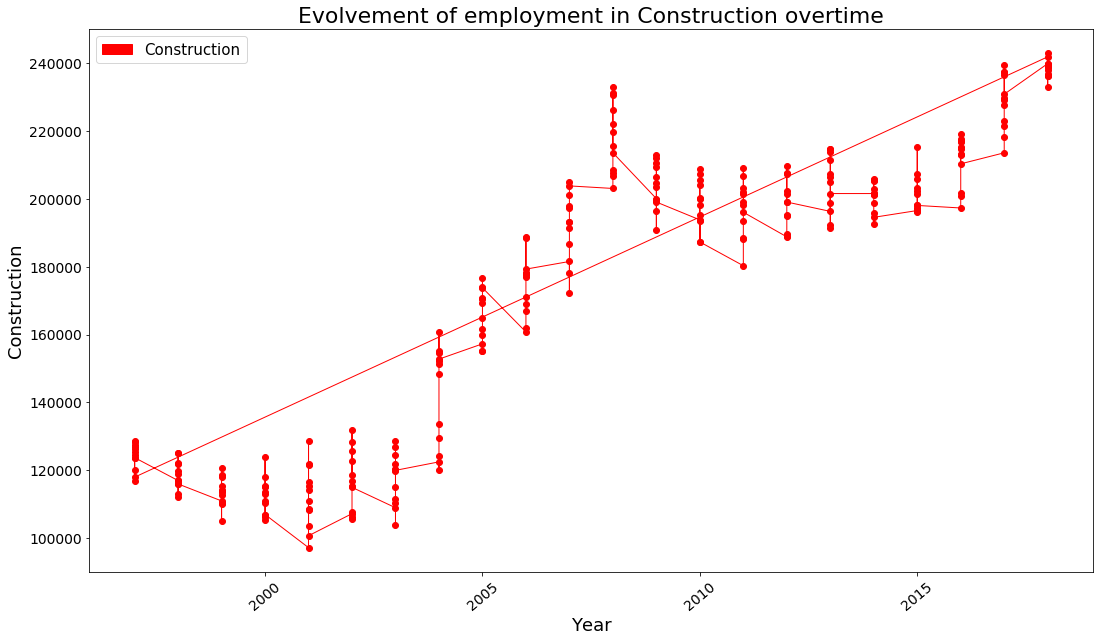

In [173]:
plt.figure(figsize=(18,10))
plt.plot(Construction['SYEAR'], Construction['Employment'], color = 'r',marker='o', linewidth=1)

plt.xlabel('Year', fontsize=18)
plt.xticks(rotation=40, fontsize = 14)
plt.ylabel('Construction', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Evolvement of employment in Construction overtime', fontsize=22)
red = patches.Patch(color='red', label='Construction')
plt.legend(handles=[red], prop = {'size':15})

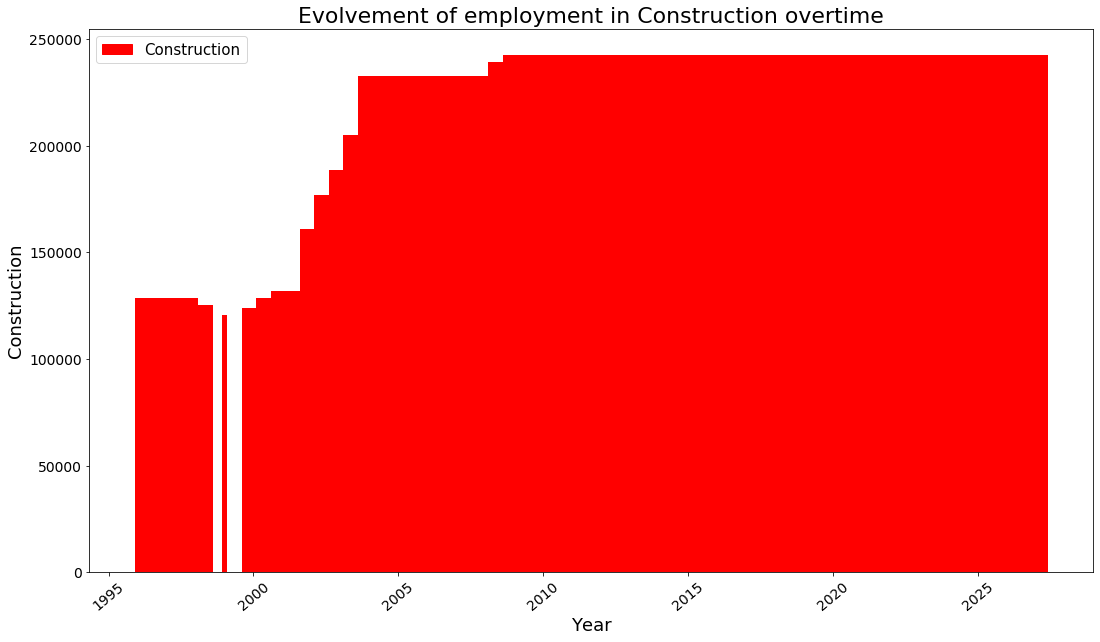

In [174]:
plt.figure(figsize=(18,10))
plt.bar(Construction['SYEAR'], Construction['Employment'], color = 'r')

plt.xlabel('Year', fontsize=18)
plt.xticks(rotation=40, fontsize = 14)
plt.ylabel('Construction', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Evolvement of employment in Construction overtime', fontsize=22)
red = patches.Patch(color='red', label='Construction')
plt.legend(handles=[red], prop = {'size':15})

## How employment in Construction evolved over time, compared to the total employment across all industries?

In [175]:
data_output.loc[data_output['LMO_Detailed_Industry'] == 'Construction [23]'].groupby('SYEAR').sum()['Employment']

SYEAR
1997    1489750
1998    1424750
1999    1363500
2000    1345750
2001    1347250
2002    1401500
2003    1412000
2004    1705000
2005    1989000
2006    2097000
2007    2301000
2008    2616750
2009    2444750
2010    2380750
2011    2365750
2012    2383250
2013    2453000
2014    2406500
2015    2417750
2016    2536000
2017    2743250
2018    2860750
Name: Employment, dtype: int64

In [176]:
data_output.loc[data_output['LMO_Detailed_Industry'] != 'Construction [23]'].groupby('SYEAR').sum()['Employment']

SYEAR
1997    20344750
1998    20454250
1999    20863000
2000    22305750
2001    22218750
2002    22602000
2003    22585750
2004    22602000
2005    23088750
2006    23592500
2007    24161500
2008    24339750
2009    23966000
2010    24443500
2011    24485750
2012    24895000
2013    24865750
2014    25087750
2015    25415500
2016    26156250
2017    27012500
2018    27220250
Name: Employment, dtype: int64

Text(0.5, 1.0, 'Evolvement of Construction compared to All other industries')

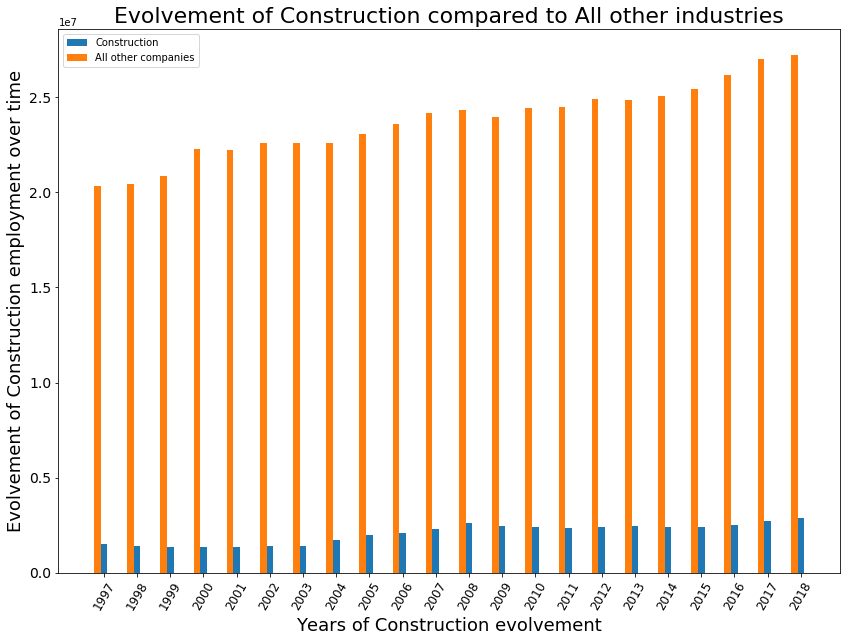

In [177]:
plt.figure(figsize=(14,10))
x_industries = ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
                '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
x_indexes = np.arange(len(x_industries))
width = 0.20


y_construction = [1489750, 1424750, 1363500, 1345750, 1347250, 1401500, 1412000, 1705000, 1989000, 2097000, 2301000, 2616750, 
                 2444750, 2380750, 2365750, 2383250, 2453000, 2406500, 2417750, 2536000, 2743250, 2860750]
plt.bar(x_indexes, y_construction, width = width, label = 'Construction')


y_other = [20344750, 20454250, 20863000, 22305750, 22218750, 22602000, 22585750, 22602000, 23088750, 23592500, 24161500, 
           24339750, 23966000, 24443500, 24485750, 24895000, 24865750, 25087750, 25415500, 26156250, 27012500, 27220250]
plt.bar(x_indexes - width, y_other, width = width ,label = 'All other companies')


plt.legend()
plt.xlabel('Years of Construction evolvement', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_industries, fontsize = 12, rotation = 60)
plt.ylabel('Evolvement of Construction employment over time', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Evolvement of Construction compared to All other industries', fontsize=22)

## How employment in Other manufacturing evolved over time, compared to the employment across Other retail trade in terms of month and years?

In [193]:
manufacturing = data_output_mixed.loc[data_output_mixed['LMO_Detailed_Industry'] == 'Other manufacturing'].groupby('SYEAR').sum()['Employment'].to_frame()
retail = data_output_mixed.loc[data_output_mixed['LMO_Detailed_Industry'] == 'Other retail trade(excluding cars and personal care)'].groupby('SYEAR').sum()['Employment'].to_frame()
years = pd.Series(x_industries).to_frame()

In [194]:
years

,0
0,1997
1,1998
2,1999
3,2000
4,2001
5,2002
6,2003
7,2004
8,2005
9,2006


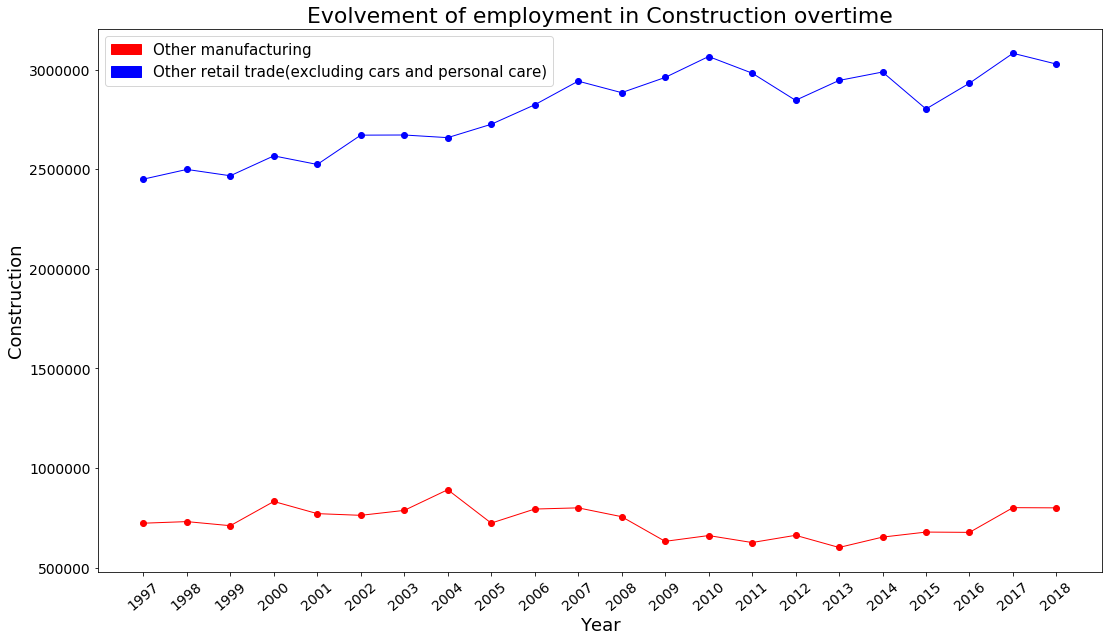

In [198]:
plt.figure(figsize=(18,10))
plt.plot(years[0], manufacturing['Employment'], color = 'r',marker='o', linewidth=1)
plt.plot(years[0], retail['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Year', fontsize=18)
plt.xticks(rotation=40, fontsize = 14)
plt.ylabel('Construction', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Evolvement of employment in Construction overtime', fontsize=22)
red = patches.Patch(color='red', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Other retail trade(excluding cars and personal care)')
plt.legend(handles=[red, blue], prop = {'size':15})

,Employment
SYEAR,
1997,2450000
1998,2498750
1999,2467000
2000,2566750
2001,2523750
2002,2670750
2003,2671500
2004,2658250
2005,2725250


In [180]:
data_output_mixed.loc[data_output_mixed['LMO_Detailed_Industry'] == 'Other manufacturing'].groupby('SMTH').sum()['Employment']


SMTH
1     1292750
2     1282000
3     1314000
4     1294000
5     1319750
6     1342250
7     1374500
8     1360750
9     1382750
10    1387000
11    1395250
12    1345250
Name: Employment, dtype: int64

In [181]:
data_output_mixed.loc[data_output_mixed['LMO_Detailed_Industry'] == 'Other retail trade(excluding cars and personal care)'].groupby('SMTH').sum()['Employment']


SMTH
1     5038250
2     5017250
3     5049500
4     5033750
5     5128000
6     5152250
7     5190750
8     5163750
9     5104000
10    5151750
11    5223000
12    5256500
Name: Employment, dtype: int64